# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FDD20E; text-align: center; line-height: 0.75;background-color: #F93822"><b>Heart Failure Prediction</b><br></h1>

<center>
    <img src="https://fldscc.com/wp-content/uploads/2020/07/shutterstock_30528475.jpg" alt="Heart Failure Prediction" width="25%">
</center>

### Problem Statement :

With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

### Aim :
- To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
- It is a **binary classification** with multiple numerical and categorical features.

### <center>Dataset Attributes</center>
    
- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Modeling
- Conclusion

### What you will learn :
- Data Visualization
- Data Scaling
- Statistical Tests for Feature Engineering
- Modeling and visualization of results for algorithms

### Related Work :

- [Binary Classification](https://www.kaggle.com/competitions/titanic/discussion/352223) **: It is a discussion post that describes the approach required to deal with Binary Classification problems explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Time Series Analysis](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/352205) **: It is a discussion post that describes the basics of Time Series Analysis explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Unsupervised Learning](https://www.kaggle.com/code/tanmay111999/mall-customer-segmentation-k-means-eda) **: It is a notebook that describes the work on Unsupervised Learning problem using K-Means clustering algorithm!**

### Lets get started!

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [1]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.7 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./input/heart-failure-prediction/heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

### Data Info :

In [4]:
data.shape

(918, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


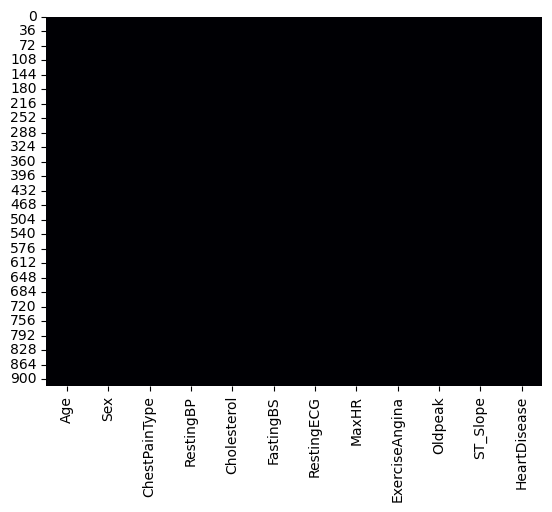

In [7]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [8]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

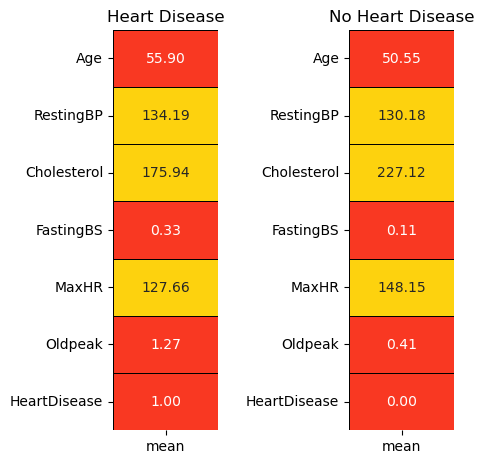

In [9]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

- **Mean** values of all the features for cases of heart diseases and non-heart diseases.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividing features into Numerical and Categorical :

In [10]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

### Categorical Features :

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

#### Distribution of Categorical Features :

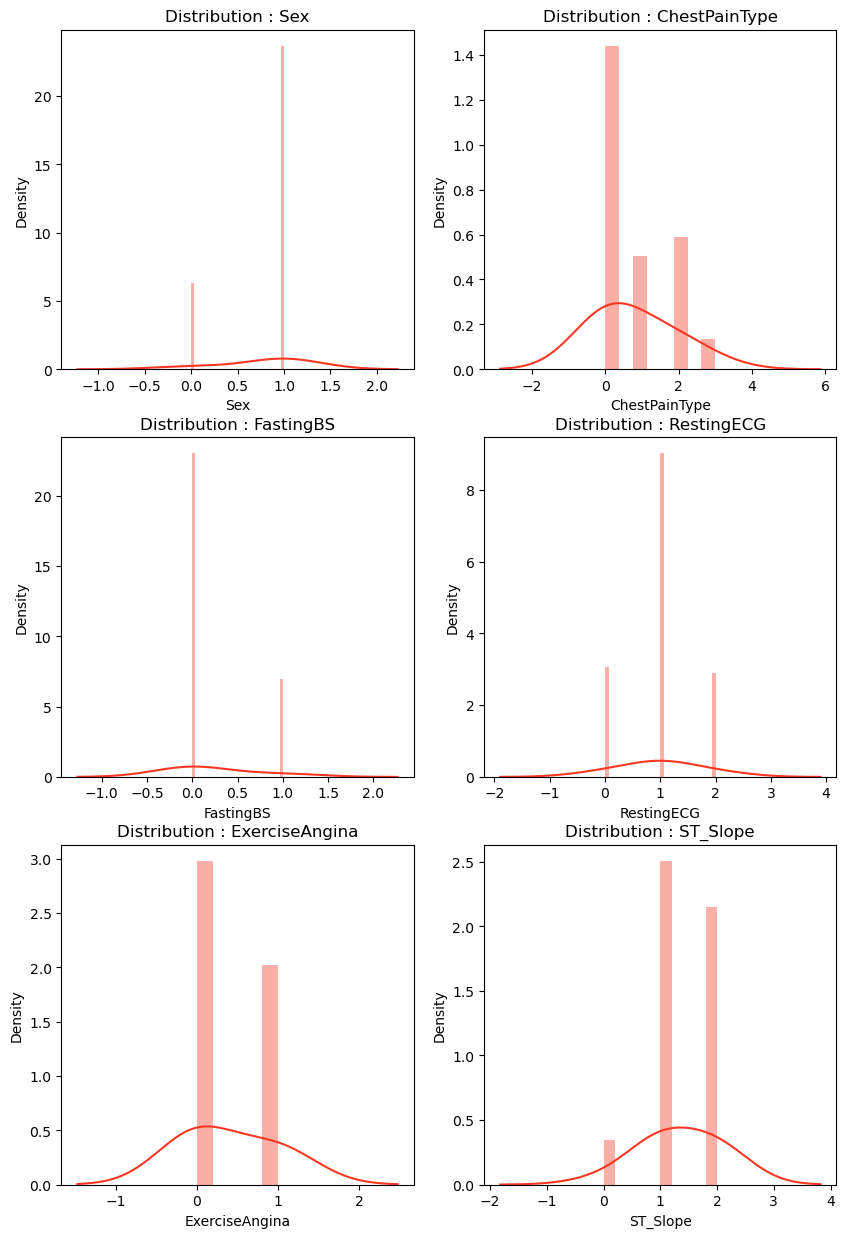

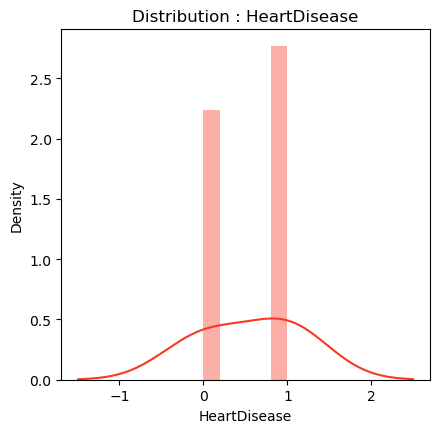

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- All the categorical features are near about **Normally Distributed**.

### Numerical Features :

#### Distribution of Numerical Features :

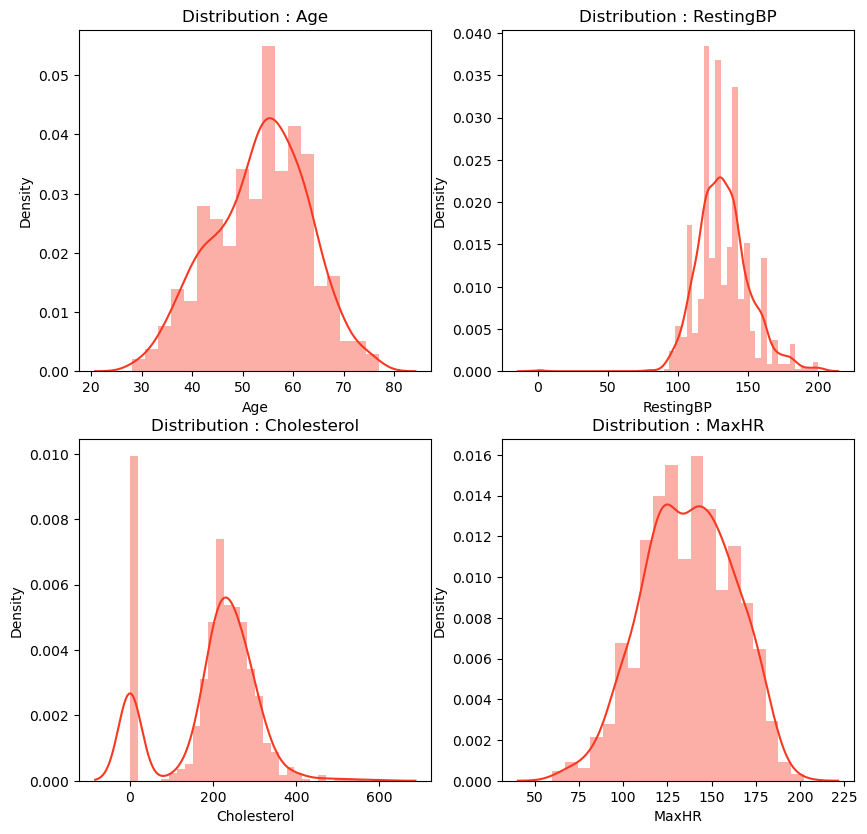

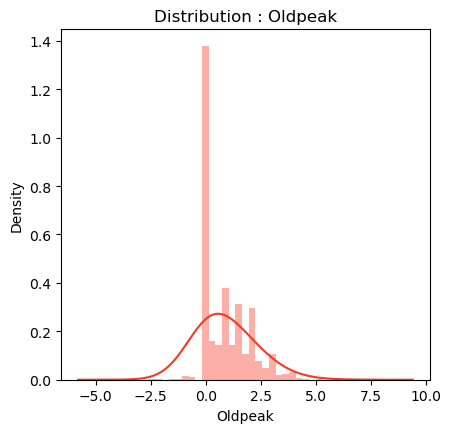

In [13]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

### Target Variable Visualization (HeartDisease) : 

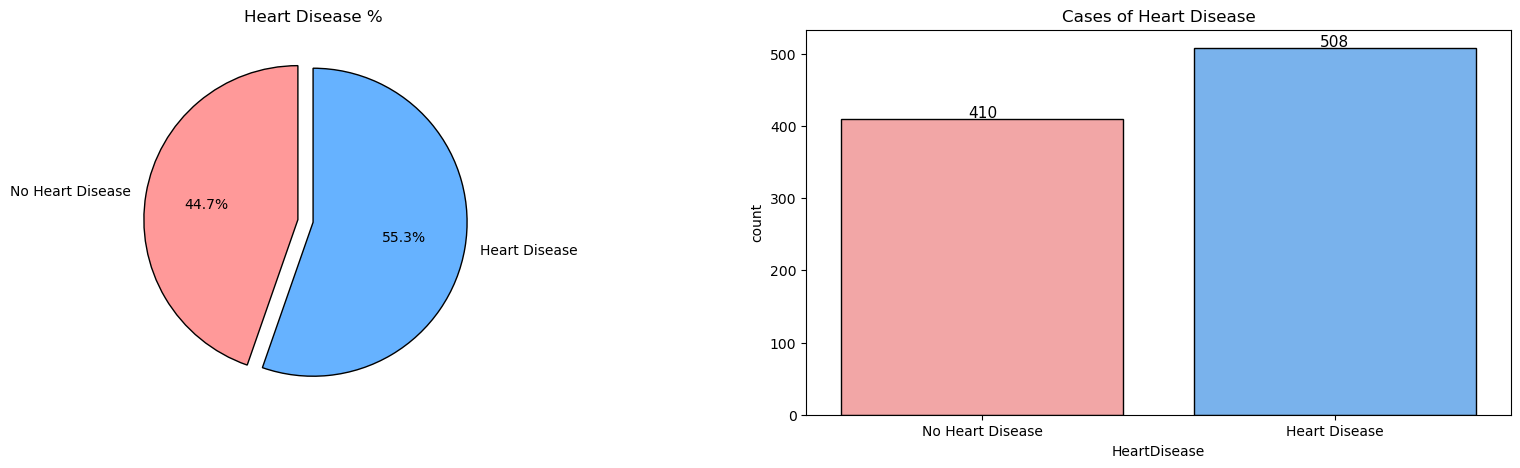

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate heart disease distribution
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# First subplot - Pie chart
plt.subplot(1,2,1)
colors = ['#FF9999', '#66B2FF']  # Define colors for consistency
plt.pie(circle, 
        labels=['No Heart Disease', 'Heart Disease'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.1,0),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Second subplot - Count plot
plt.subplot(1,2,2)
# Corrected countplot syntax
ax = sns.countplot(x='HeartDisease', 
                  data=data,
                  palette=colors,
                  edgecolor='black')

# Add value labels on bars
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, 
            rect.get_height() + 2,
            f'{int(rect.get_height())}',
            horizontalalignment='center',
            fontsize=11)

ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.show()

- The dataset is pretty much **evenly balanced!**

### Categorical Features vs Target Variable (HeartDisease) :

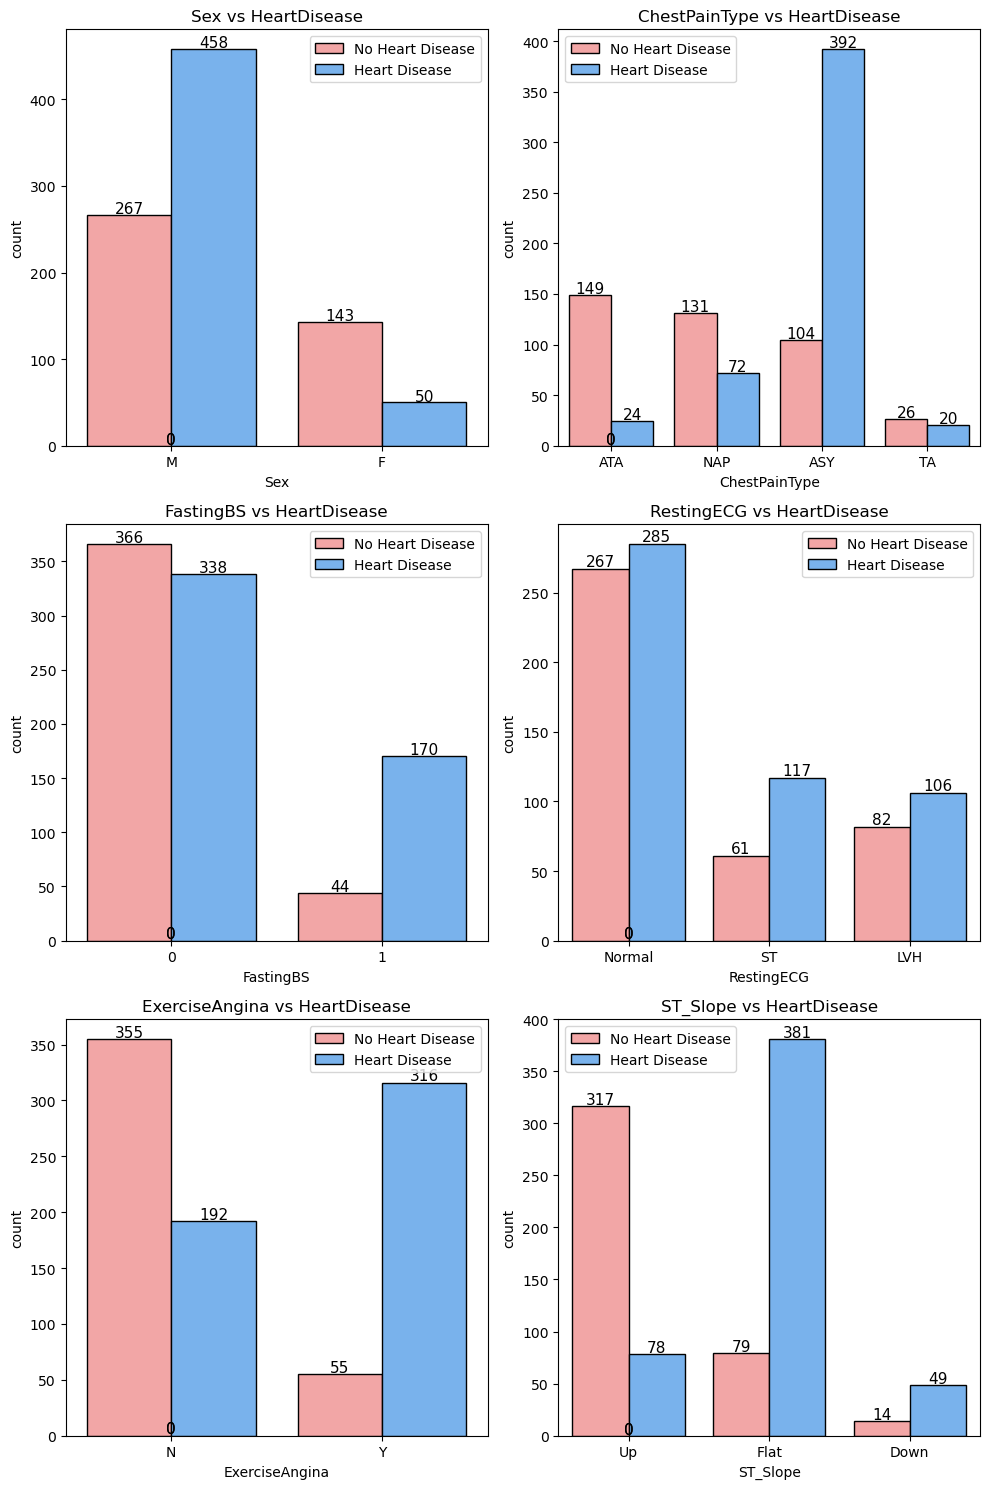

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

# Colors for consistent visualization
colors = ['#FF9999', '#66B2FF']

# Create plots for each categorical feature
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i+1)
    
    # Corrected countplot syntax with x= parameter
    ax = sns.countplot(x=categorical_features[i],
                      data=data,
                      hue="HeartDisease",
                      palette=colors,
                      edgecolor='black')
    
    # Add value labels on bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height() + 2,
                int(rect.get_height()),
                horizontalalignment='center',
                fontsize=11)
    
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- **Male** population has more heart disease patients than no heart disease patients. In the case of **Female** population, heart disease patients are less than no heart disease patients. 
- **ASY** type of chest pain boldly points towards major chances of heart disease.
- **Fasting Blood Sugar** is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients. 
- **RestingECG** does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- **Exercise Induced Engina** definitely bumps the probability of being diagnosed with heart diseases.
- With the **ST_Slope** values, **flat** slope displays a very high probability of being diagnosed with heart disease. **Down** also shows the same output but in very few data points. 

### Categorical Features vs Positive Heart Disease Cases :

In [16]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

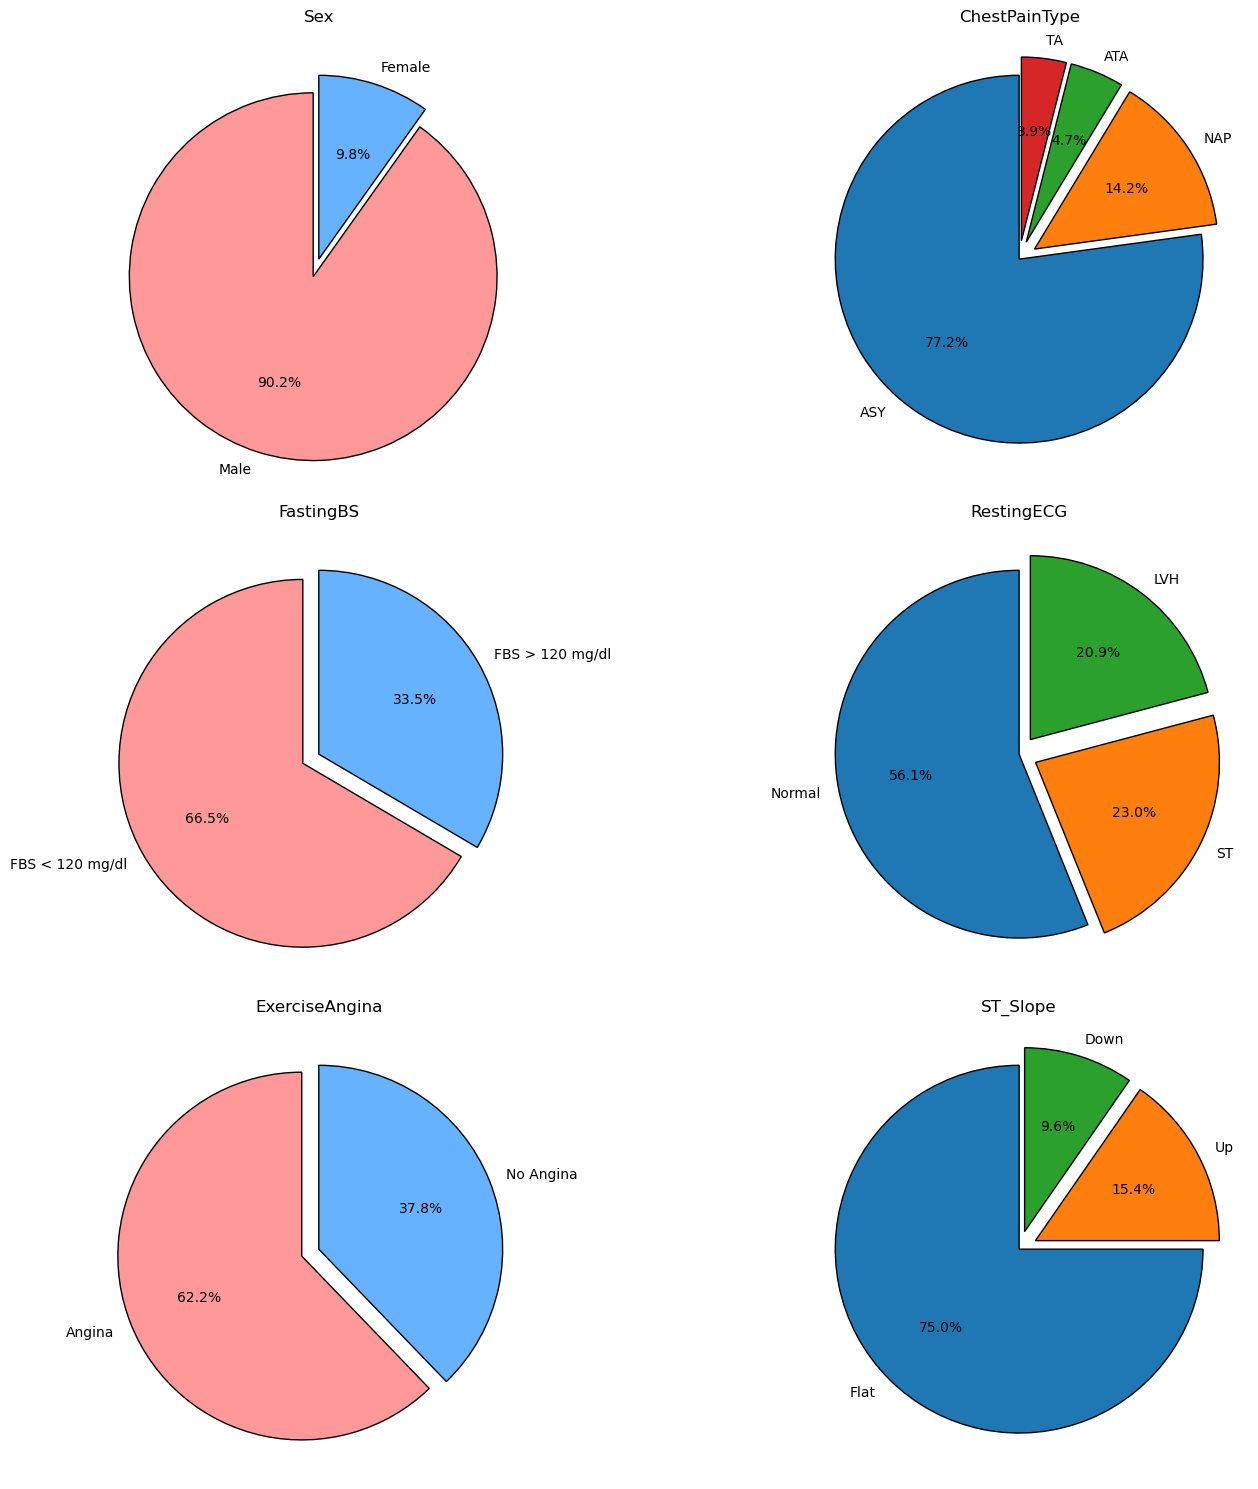

In [17]:
# Create figure and axes with correct dimensions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Define common pie chart properties
pie_props = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'wedgeprops': {'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
}

# Plot 1: Sex
axes[0].pie(sex, labels=['Male', 'Female'], 
            explode=(0.1, 0), colors=colors, **pie_props)
axes[0].set_title('Sex')

# Plot 2: ChestPainType
axes[1].pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'],
            explode=(0, 0.1, 0.1, 0.1), **pie_props)
axes[1].set_title('ChestPainType')

# Plot 3: FastingBS
axes[2].pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'],
            explode=(0.1, 0), colors=colors, **pie_props)
axes[2].set_title('FastingBS')

# Plot 4: RestingECG
axes[3].pie(restecg, labels=['Normal', 'ST', 'LVH'],
            explode=(0, 0.1, 0.1), **pie_props)
axes[3].set_title('RestingECG')

# Plot 5: ExerciseAngina
axes[4].pie(exang, labels=['Angina', 'No Angina'],
            explode=(0.1, 0), colors=colors, **pie_props)
axes[4].set_title('ExerciseAngina')

# Plot 6: ST_Slope
axes[5].pie(slope, labels=['Flat', 'Up', 'Down'],
            explode=(0, 0.1, 0.1), **pie_props)
axes[5].set_title('ST_Slope')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- Out of all the heart disease patients, a staggering 90% patients are **male**.
- When it comes to the type of chest pain, **ASY** type holds the majority with 77% that lead to heart diseases.
- **Fasting Blood Sugar** level < 120 mg/dl displays high chances of heart diseases.
- For **RestingECG**, **Normal** level accounts for 56% chances of heart diseases than **LVH** and **ST** levels.
- Detection of **Exercise Induced Angina** also points towards heart diseases.
- When it comes to **ST_Slope** readings, **Flat** level holds a massive chunk with 75% that may assist in detecting underlying heart problems. 

### Numerical Features vs Target Variable (HeartDisease) :

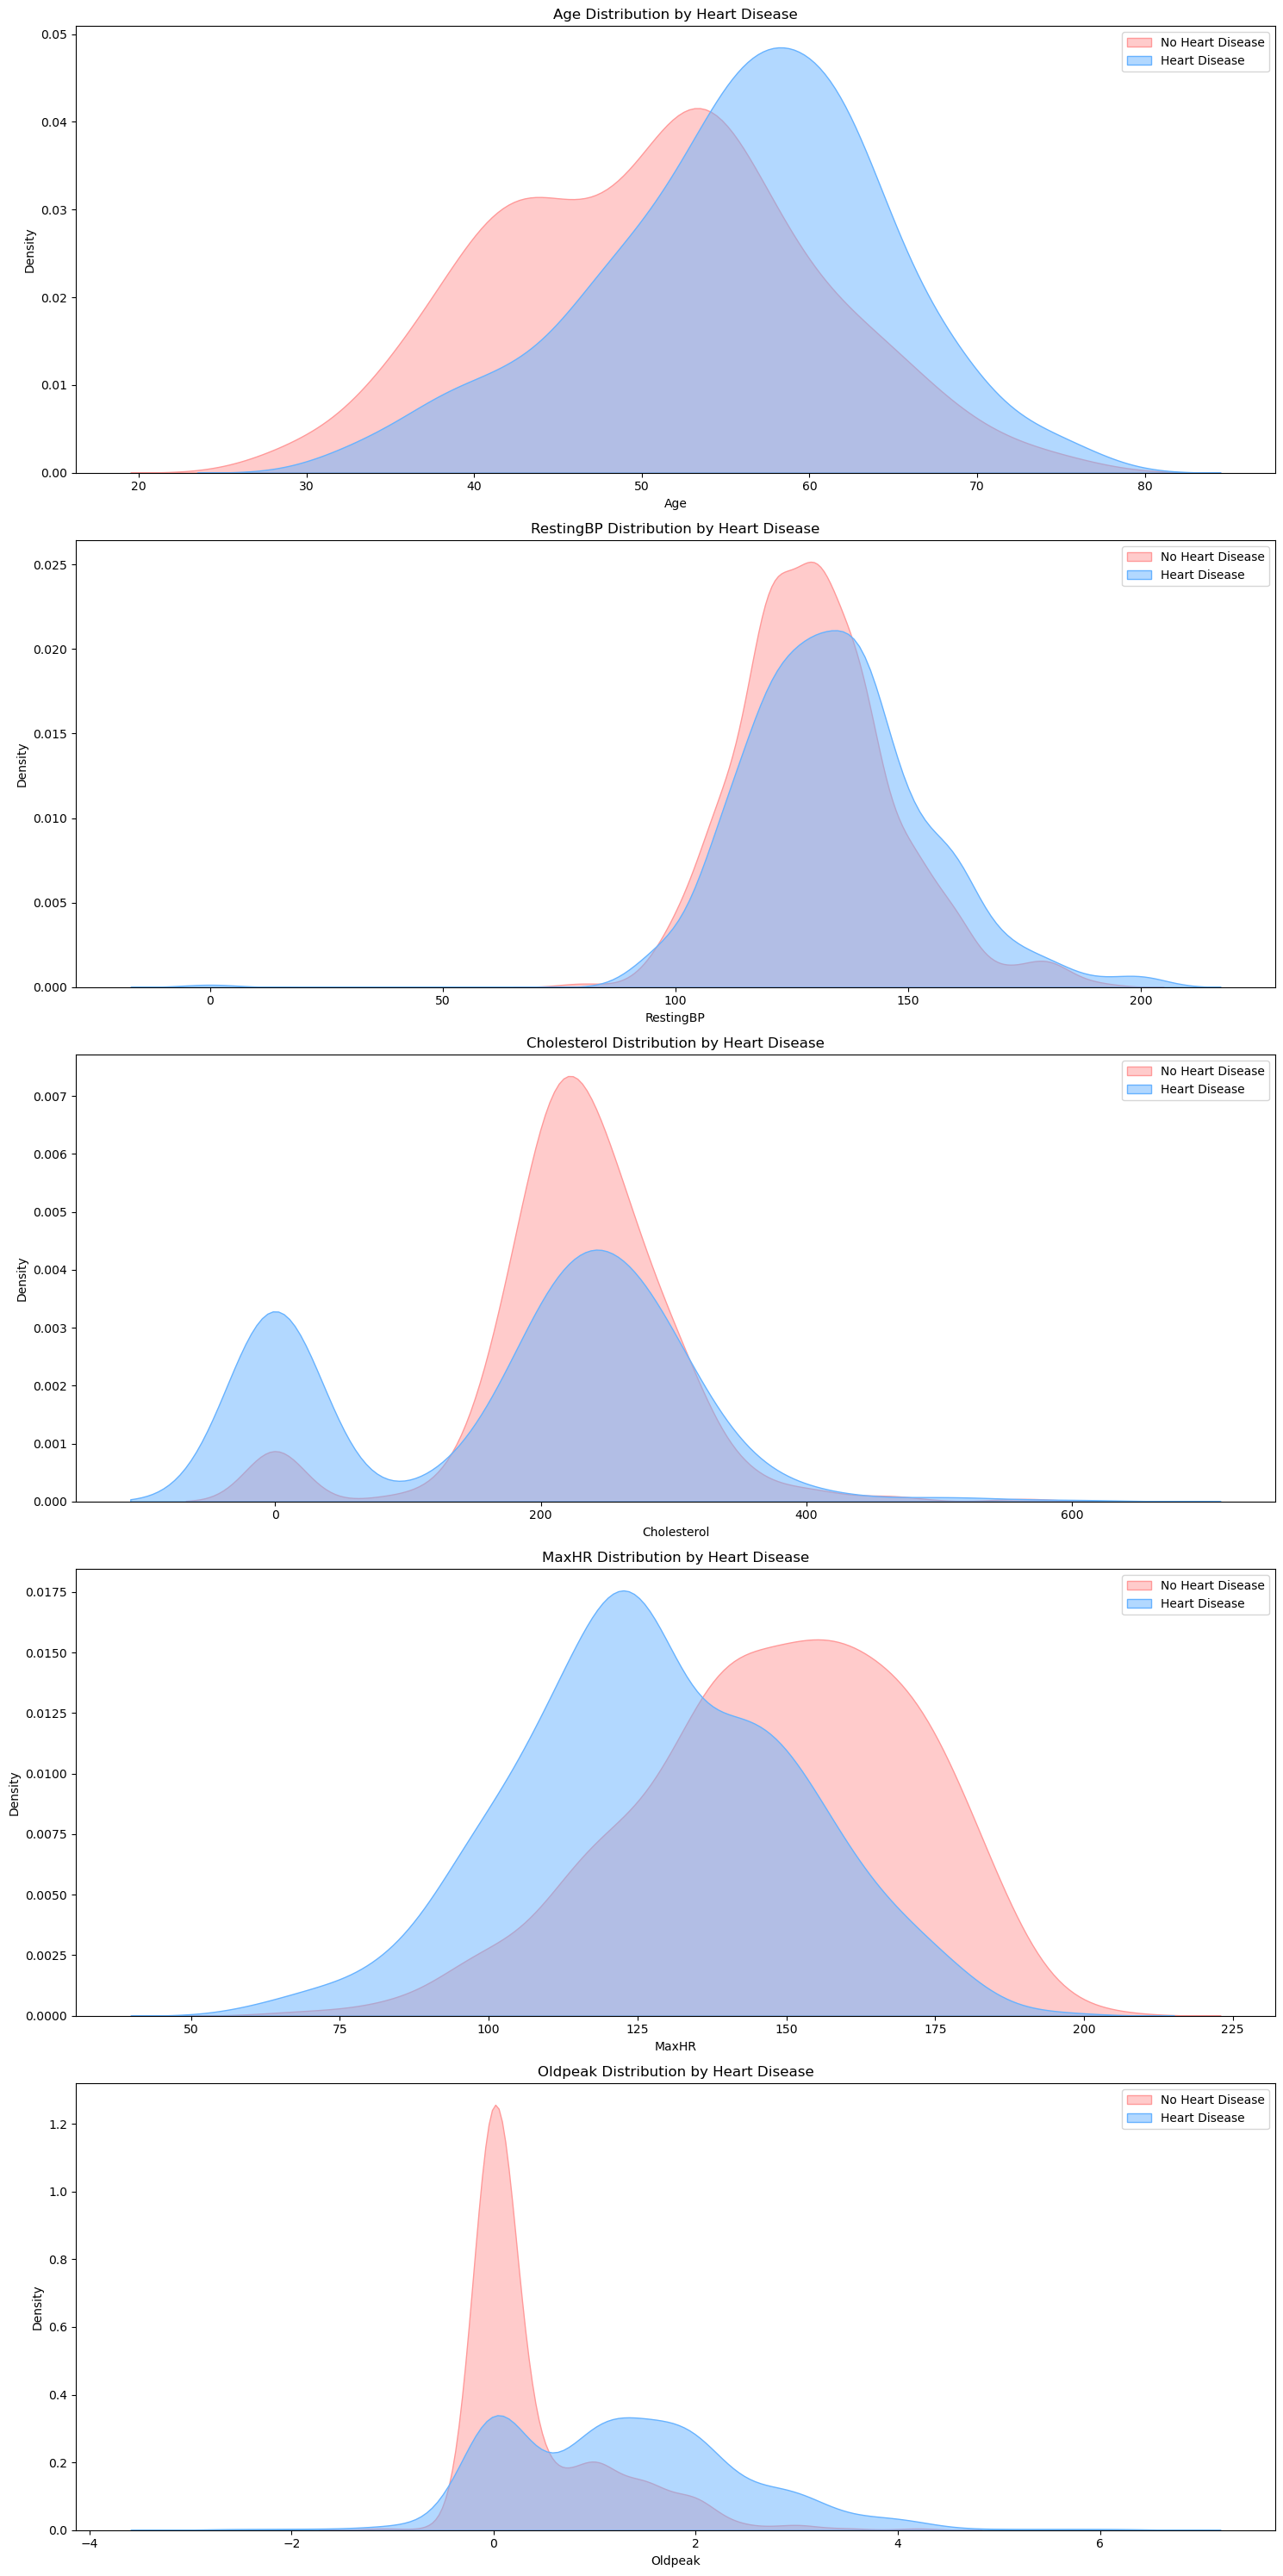

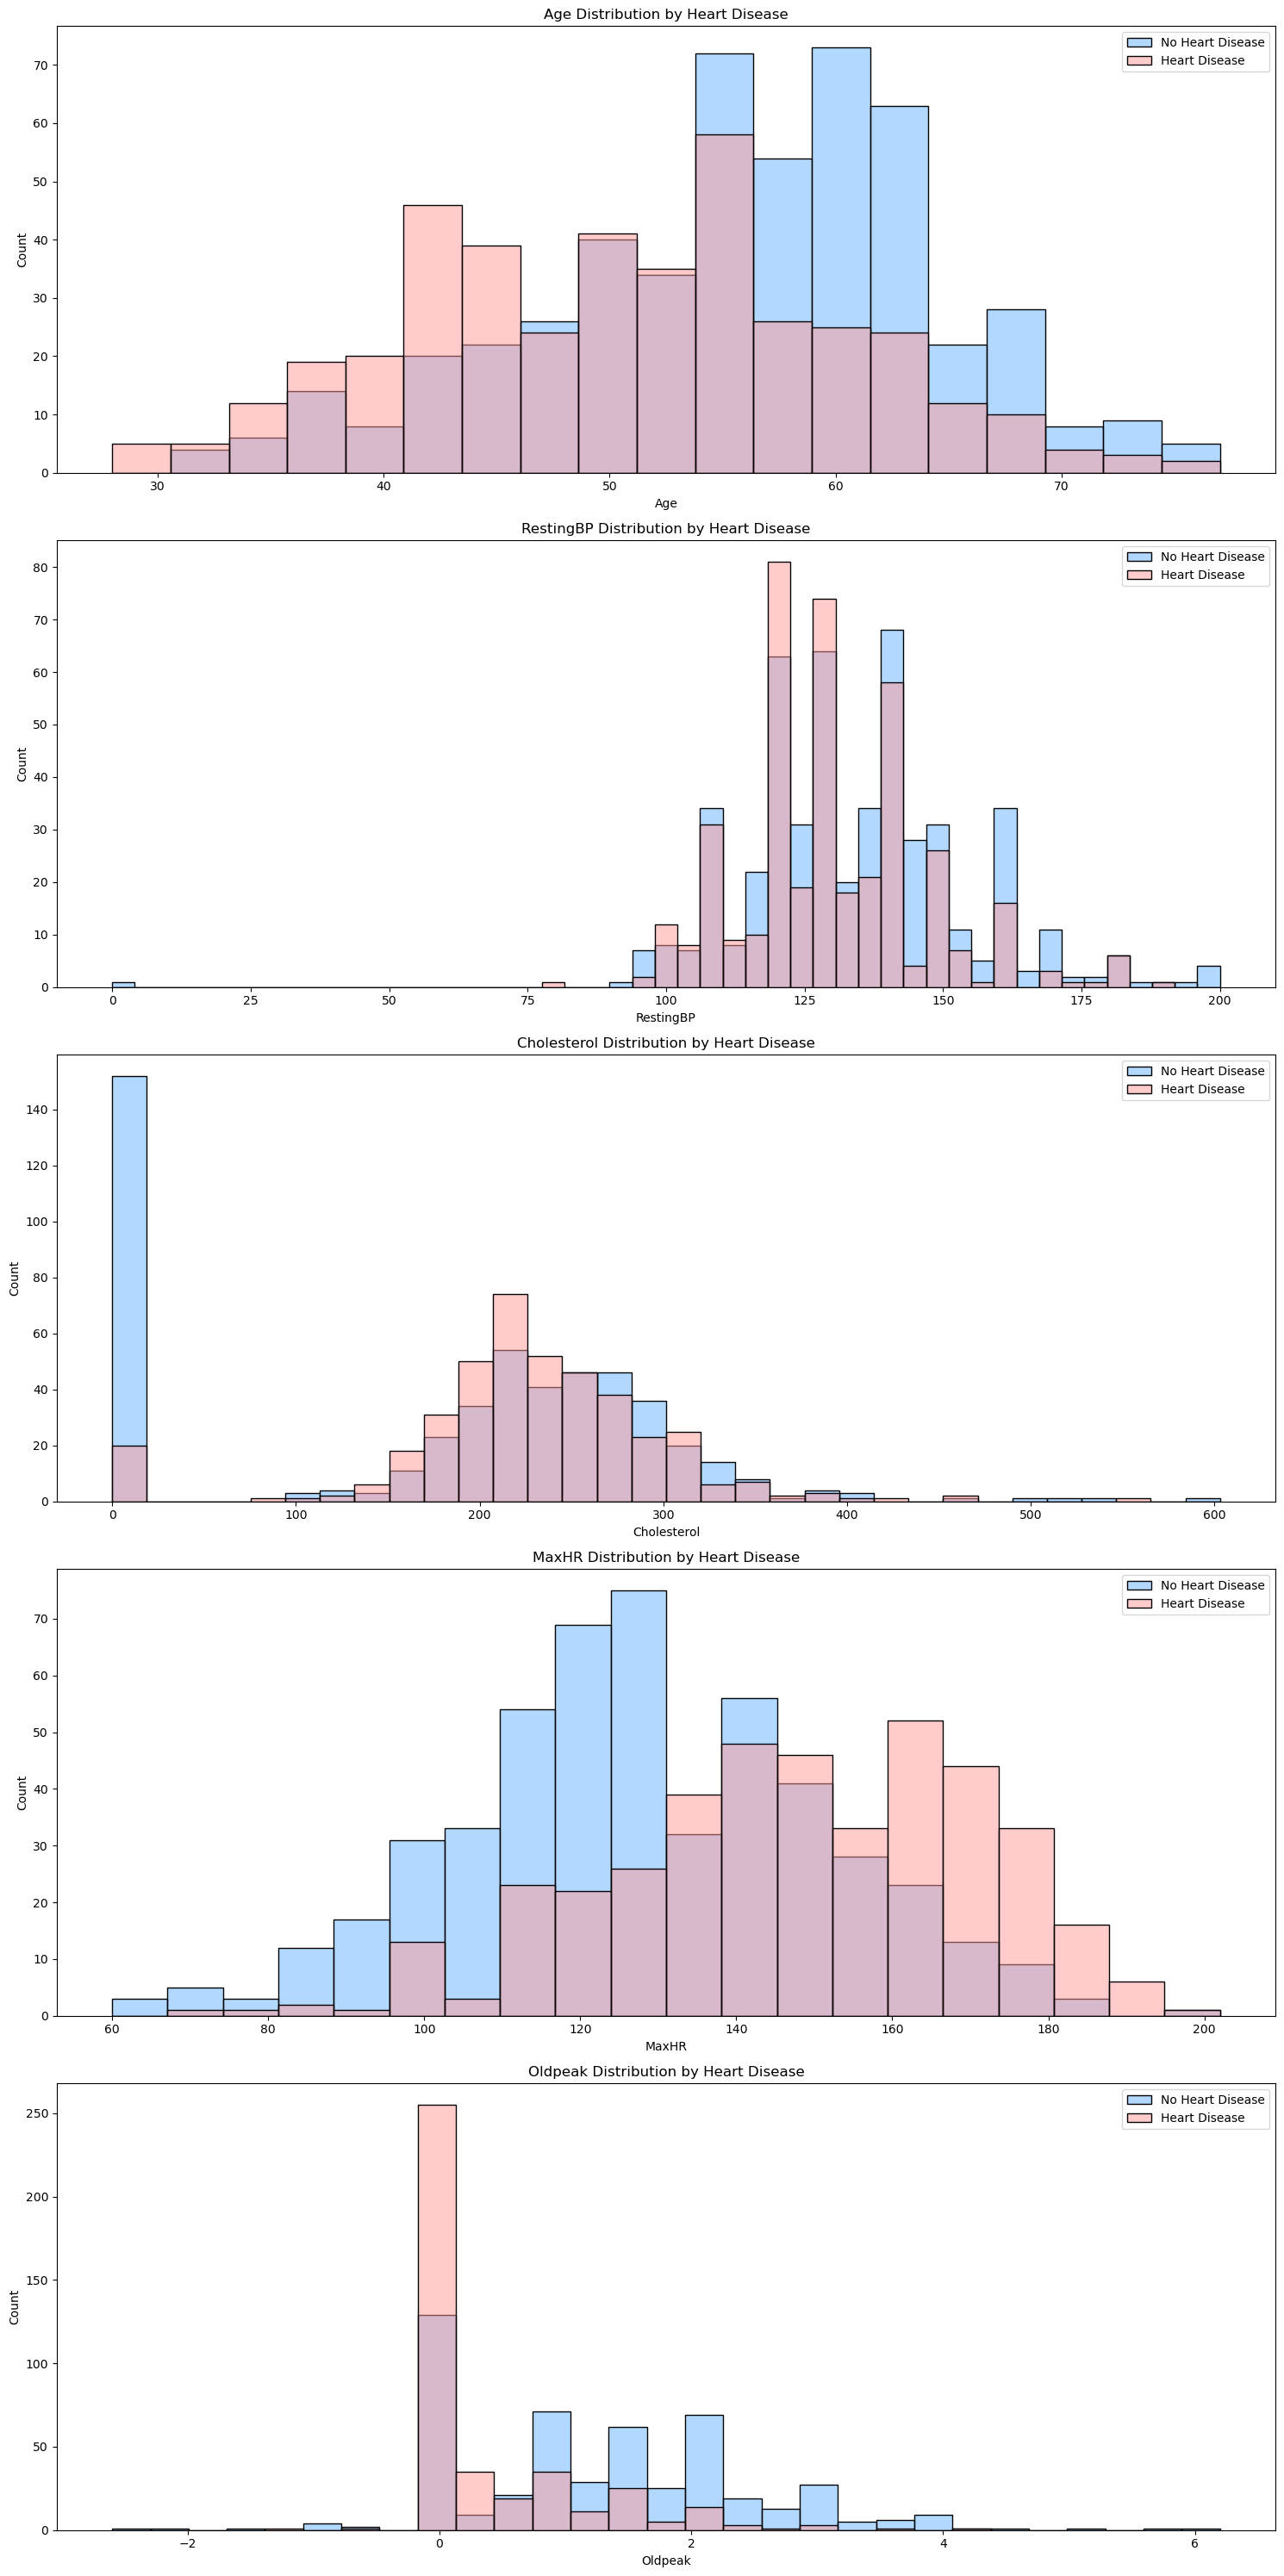

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

# Colors for the two classes
colors = ['#FF9999', '#66B2FF']

# Create plots for each numerical feature
for i in range(len(numerical_features)):
    plt.subplot(5, 1, i+1)
    
    # Create histogram with KDE for each class
    for j, label in enumerate(['No Heart Disease', 'Heart Disease']):
        sns.kdeplot(data=data[data['HeartDisease'] == j][numerical_features[i]], 
                   fill=True, 
                   color=colors[j], 
                   label=label,
                   alpha=0.5)
        
    title = numerical_features[i] + ' Distribution by Heart Disease'
    plt.title(title)
    plt.xlabel(numerical_features[i])
    plt.ylabel('Density')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# If you prefer histograms without KDE, here's an alternative version using histplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

for i in range(len(numerical_features)):
    plt.subplot(5, 1, i+1)
    
    sns.histplot(data=data, 
                 x=numerical_features[i],
                 hue='HeartDisease',
                 palette=colors,
                 multiple="layer",
                 alpha=0.5)
    
    title = numerical_features[i] + ' Distribution by Heart Disease'
    plt.title(title)
    plt.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

- Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes. 
- Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition. 

In [19]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

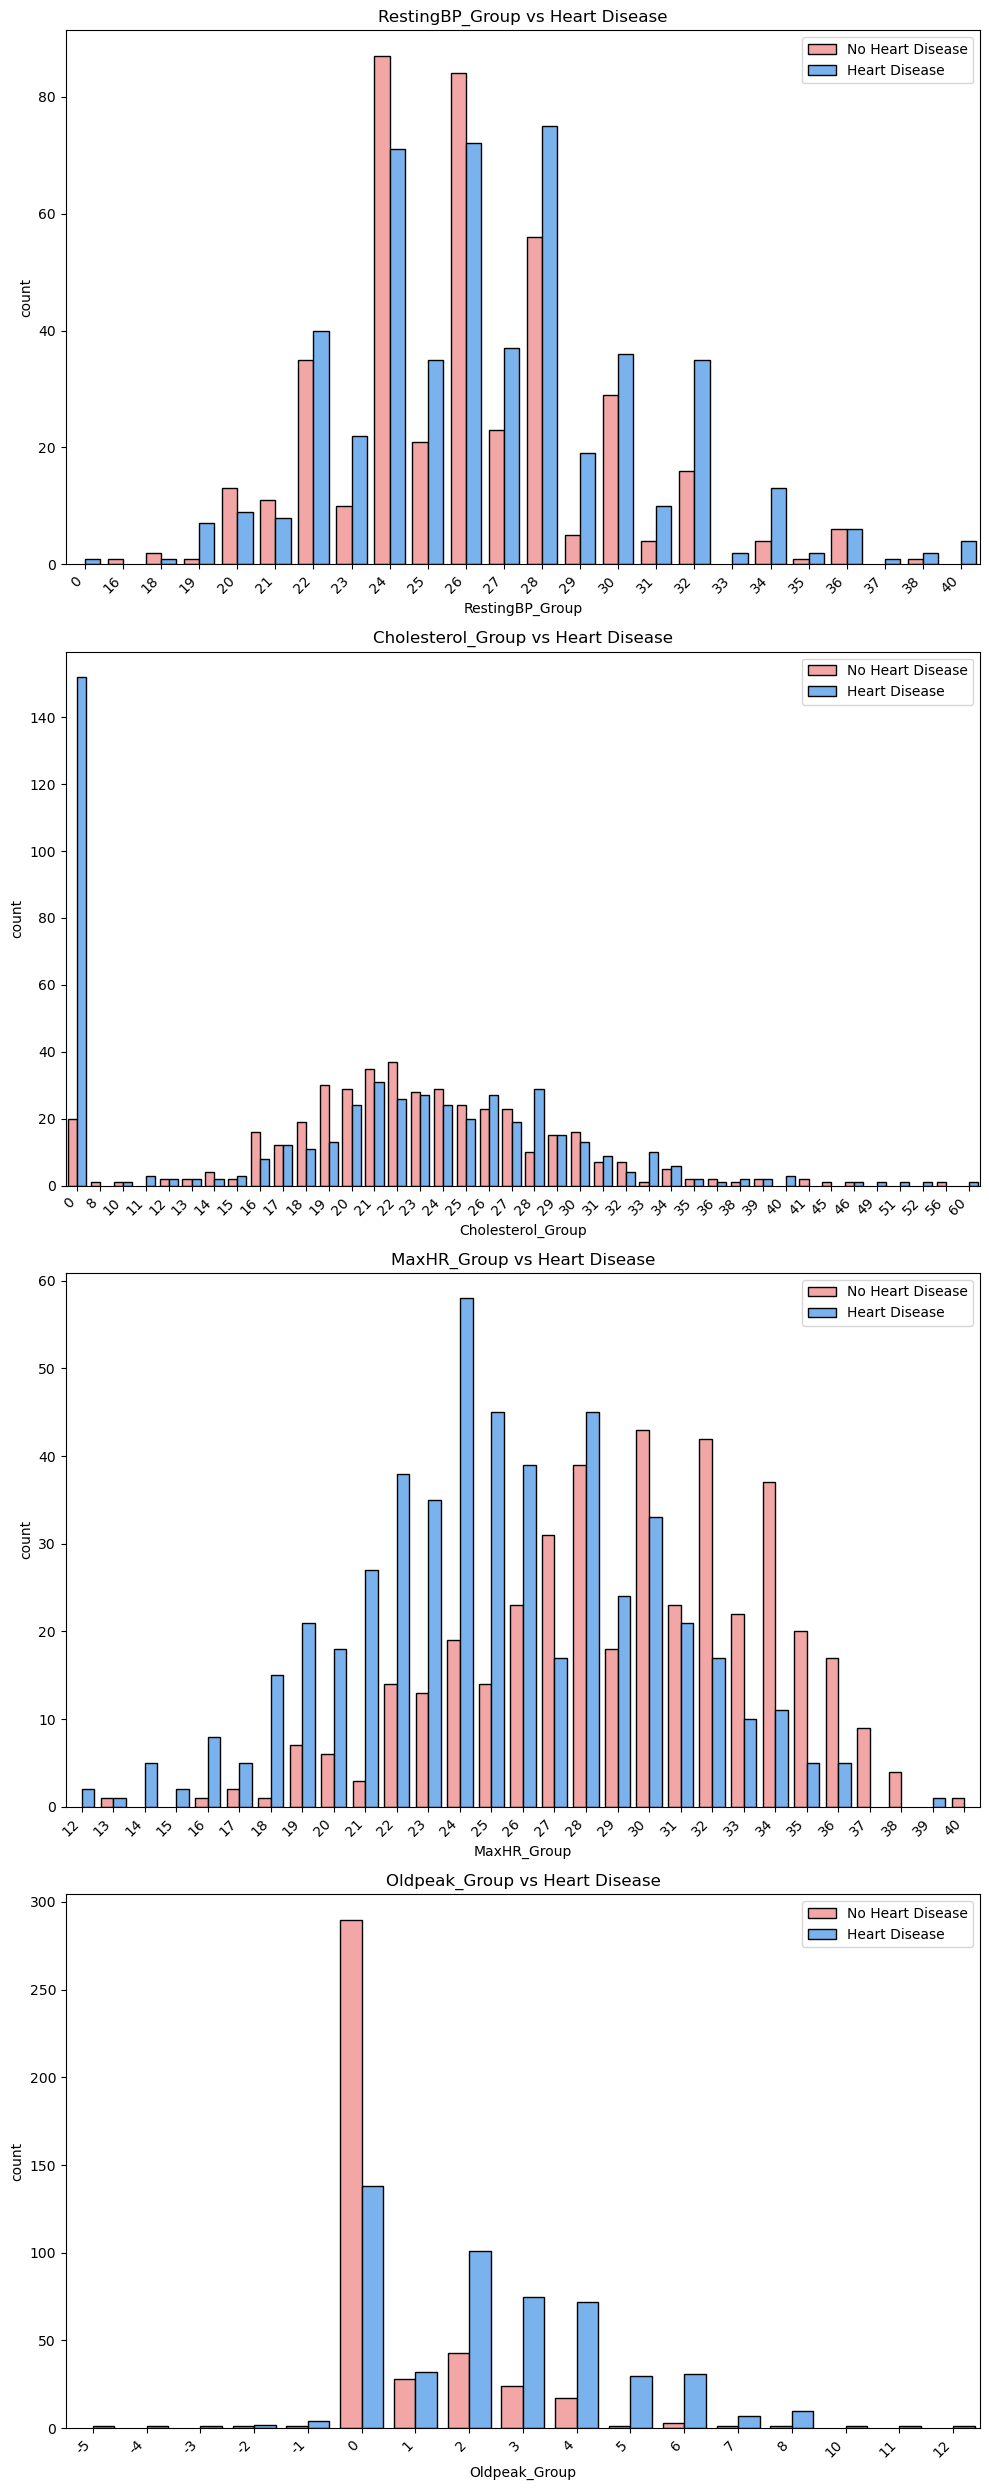

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))

# Create list of grouped feature names
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]

# Create plots for each grouped feature
for i in range(len(group_numerical_features)):
    plt.subplot(4, 1, i+1)
    
    # Corrected countplot syntax with x= parameter
    sns.countplot(x=group_numerical_features[i],
                 data=data,
                 hue="HeartDisease",
                 palette=colors,
                 edgecolor='black')
    
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title)
    
    # Rotate x-axis labels if they're overlapping
    plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- From the **RestingBP** group data, **95** (19x5) - **170** (34x5) readings are most prone to be detected with heart diseases.
- **Cholesterol** levels between **160** (16x10) - **340** (34x10) are highly susceptible to heart diseases.
- For the **MaxHR** readings, heart diseases are found throughout the data but **70** (14x5) - **180** (36x5) values has detected many cases. 
- **Oldpeak** values also display heart diseases throughout. **0** (0x5/10) - **4** (8x5/10) slope values display high probability to be diagnosed with heart diseases.

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

#### Sex vs Numerical Features :

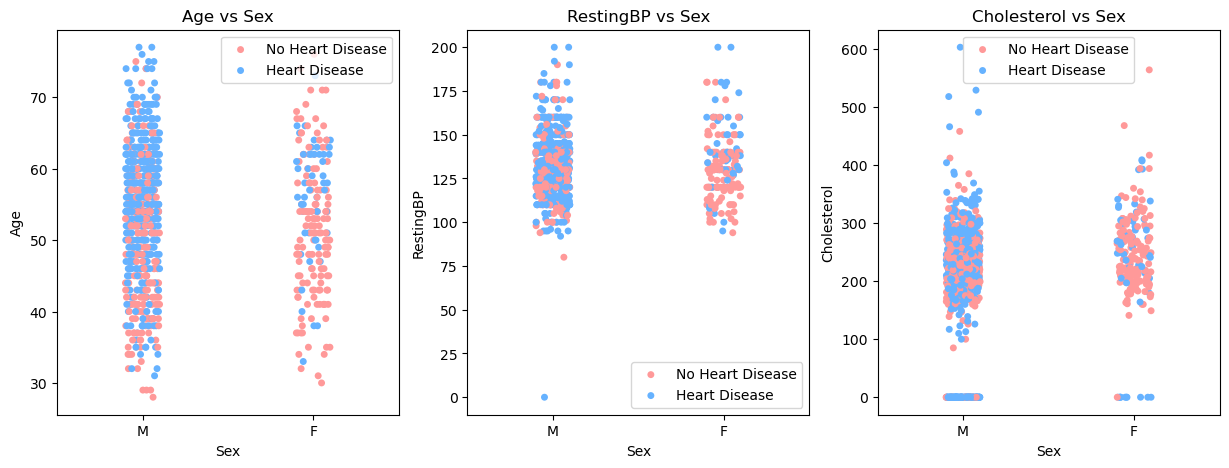

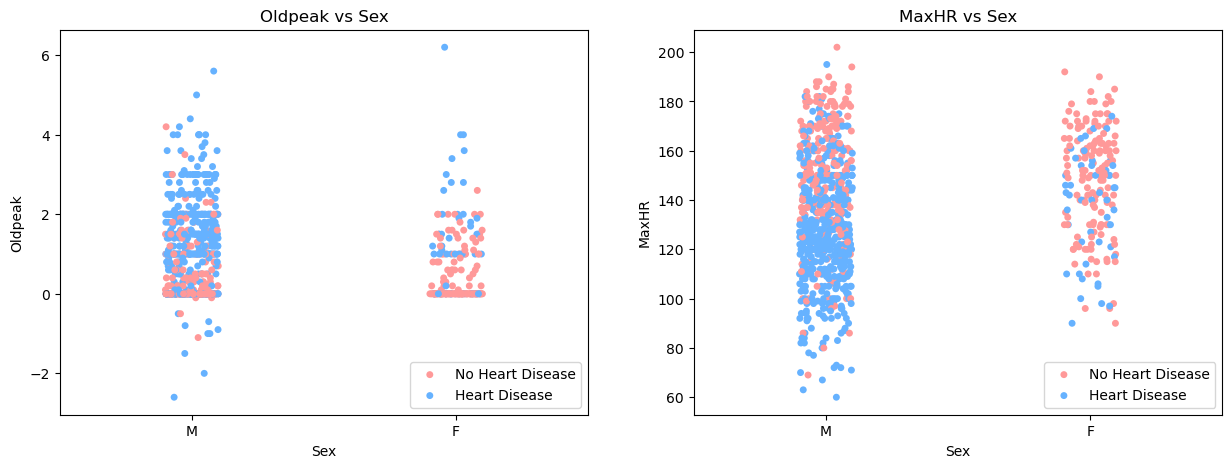

In [21]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

- **Male** population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- **Female** population data points are very less as compared to **male** population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases. 

#### ChestPainType vs Numerical Features :

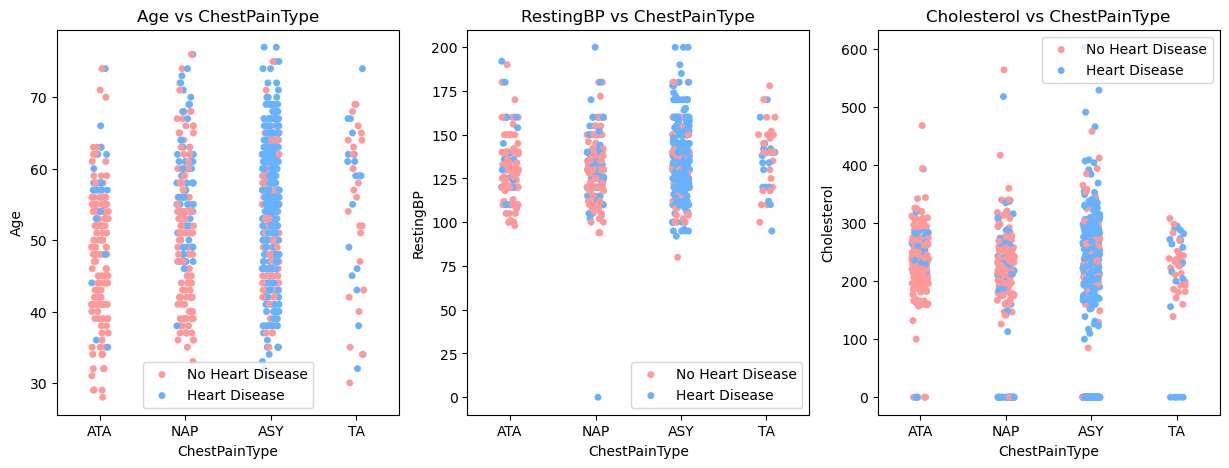

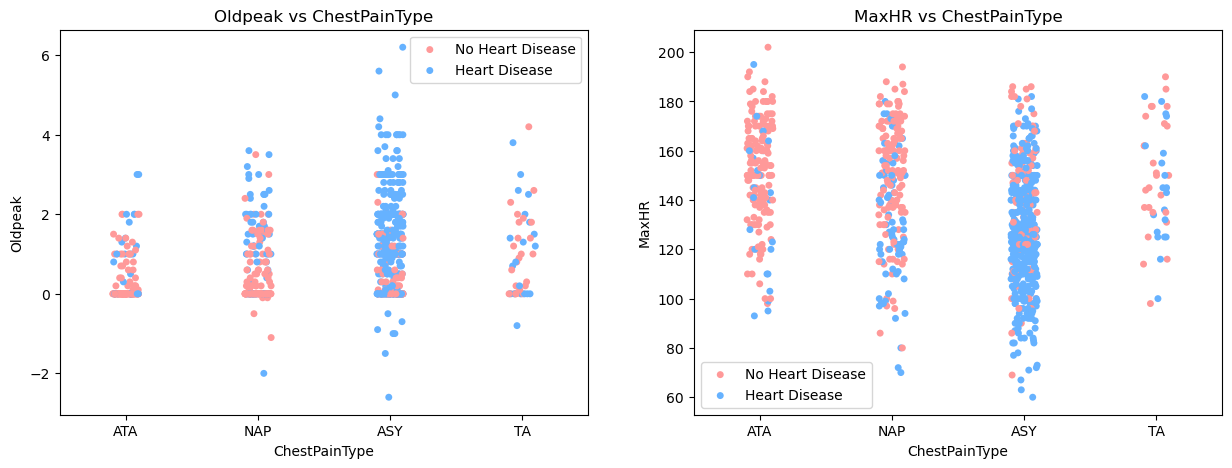

In [22]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

- **ASY** type of chest pain dominates other types of chest pain in all the numerical features by a lot.

#### FastingBS vs Numerical features :

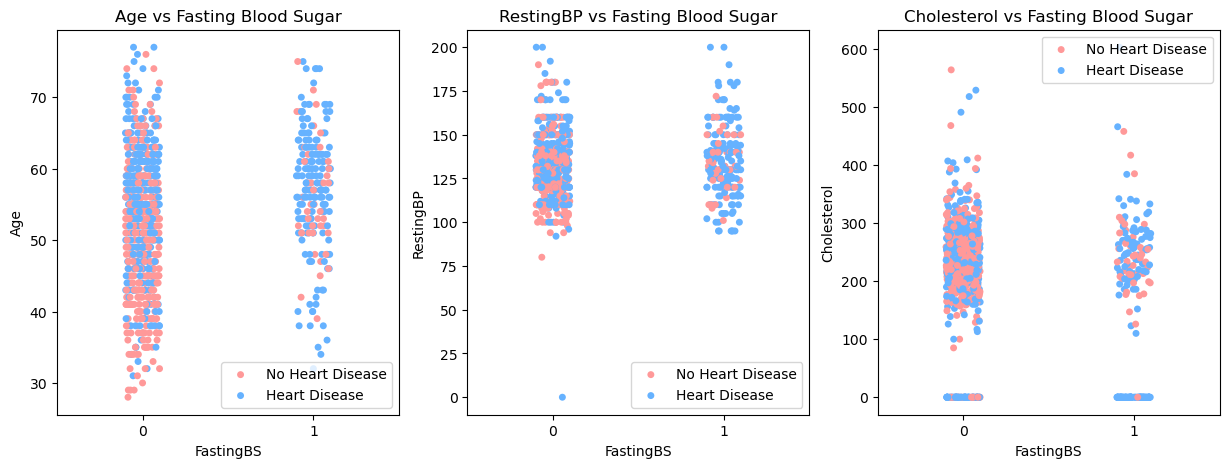

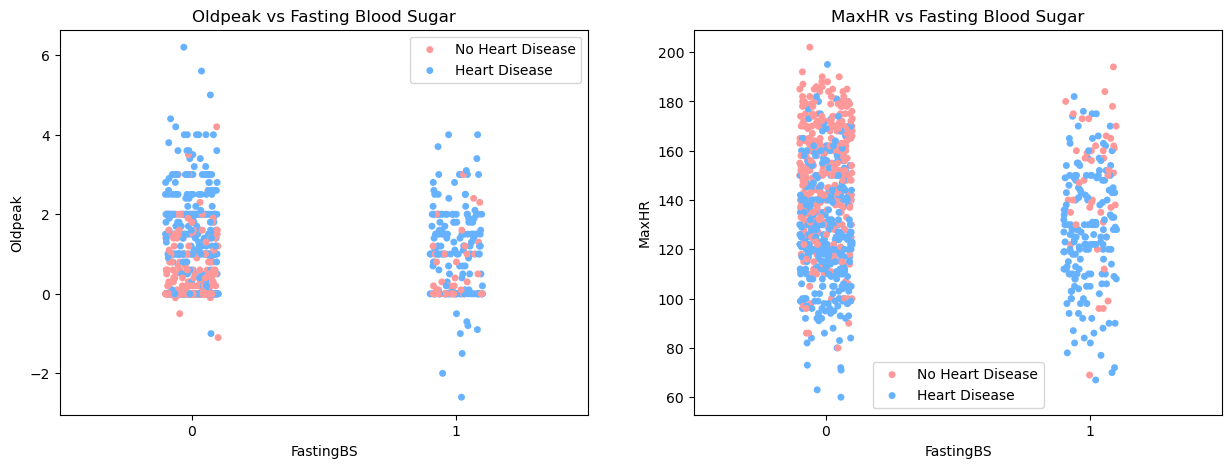

In [23]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

- Above the **age** 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
- **Fasting Blood Sugar** with **Resting BP** over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
- **Cholesterol** with **Fasting Blood Sugar** does not seem to have an effect in understanding reason behind heart diseases.
- Patients that have not been found positive with **Fasting Blood Sugar** but have maximum heart rate below 130 are more prone to heart diseases.

#### RestingECG vs Numerical Features :

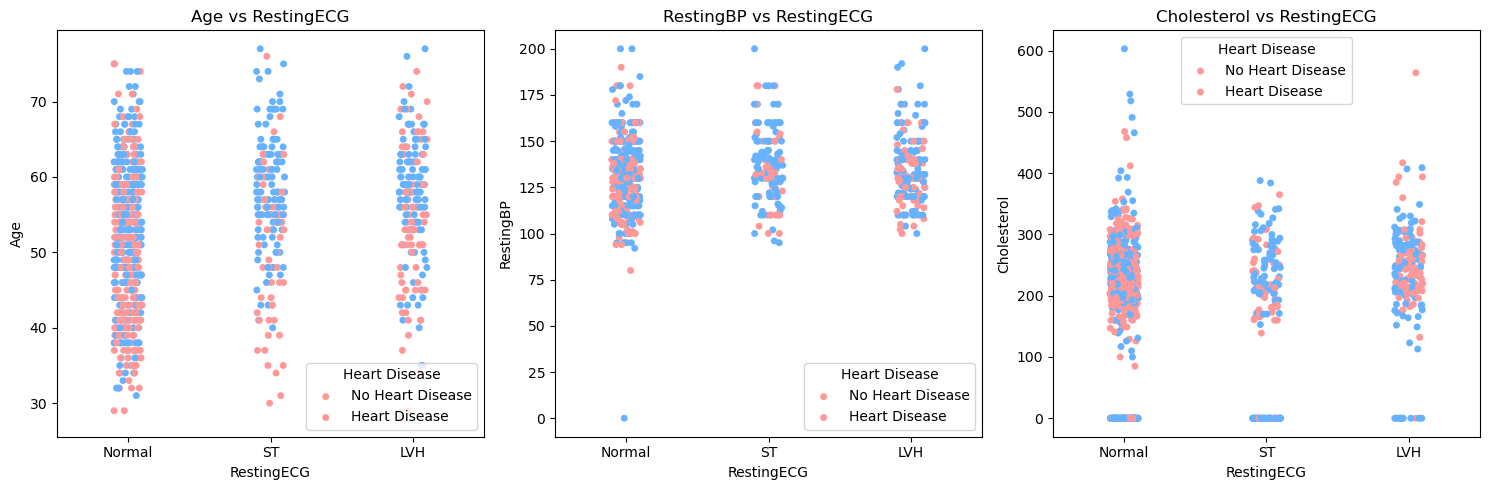

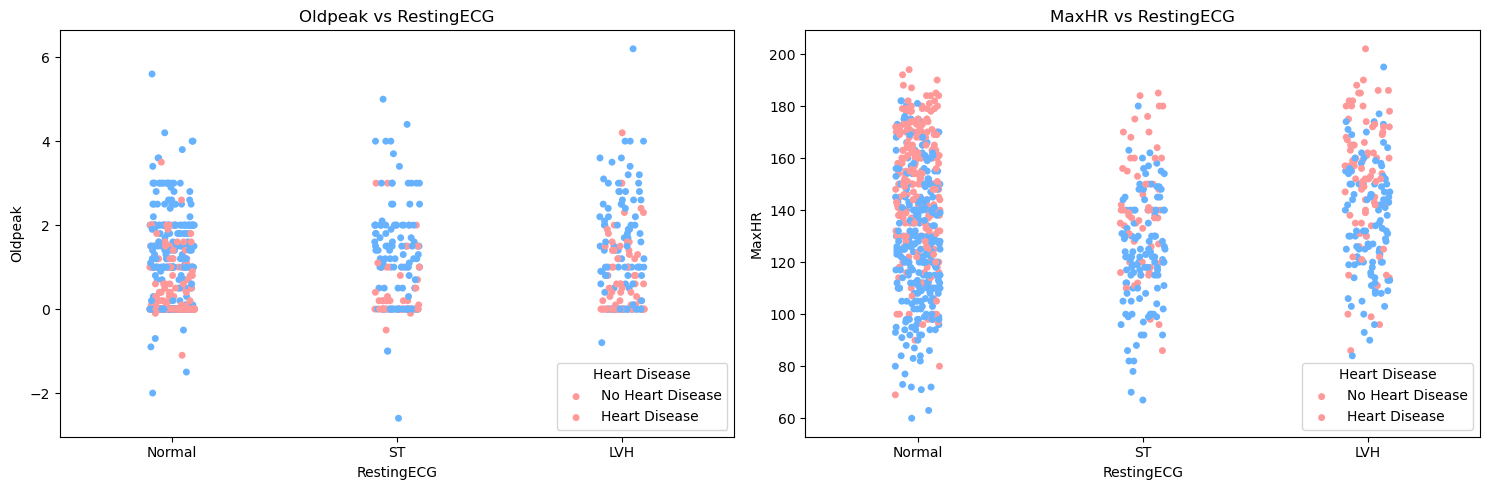

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# First set of plots (Age, RestingBP, Cholesterol)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.stripplot(x='RestingECG', 
                 y=numerical_features[i], 
                 data=data, 
                 hue='HeartDisease', 
                 palette=colors, 
                 hue_order=[0, 1])  # Specify order to match legend
    
    plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title)

plt.tight_layout()
plt.show()

# Second set of plots (MaxHR, Oldpeak)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, idx in enumerate([-1, -2]):
    plt.subplot(1, 2, i+1)
    sns.stripplot(x='RestingECG', 
                 y=numerical_features[idx], 
                 data=data, 
                 hue='HeartDisease', 
                 palette=colors,
                 hue_order=[0, 1])  # Specify order to match legend
    
    plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
    title = numerical_features[idx] + ' vs RestingECG'
    plt.title(title)

plt.tight_layout()
plt.show()

- Heart diseases with **RestingECG** values of **Normal**, **ST** and **LVH** are detected starting from 30,40 & 40 respectively. Patients above the age of 50 are more prone than anyother ages irrespective of **RestingECG** values.
- Heart diseases are found consistently throughout any values of **RestingBP** and **RestingECG**.
- **Cholesterol** values between 200 - 300 coupled with **ST** value of **RestingECG** display a patch of patients suffering from heart diseases. 
- For **maximum Heart Rate** values, heart diseases are detected in dense below 140 points and **Normal** RestingECG. **ST** & **LVH** throughout the maximum heart rate values display heart disease cases.

#### ExerciseAngina vs Numerical Features :

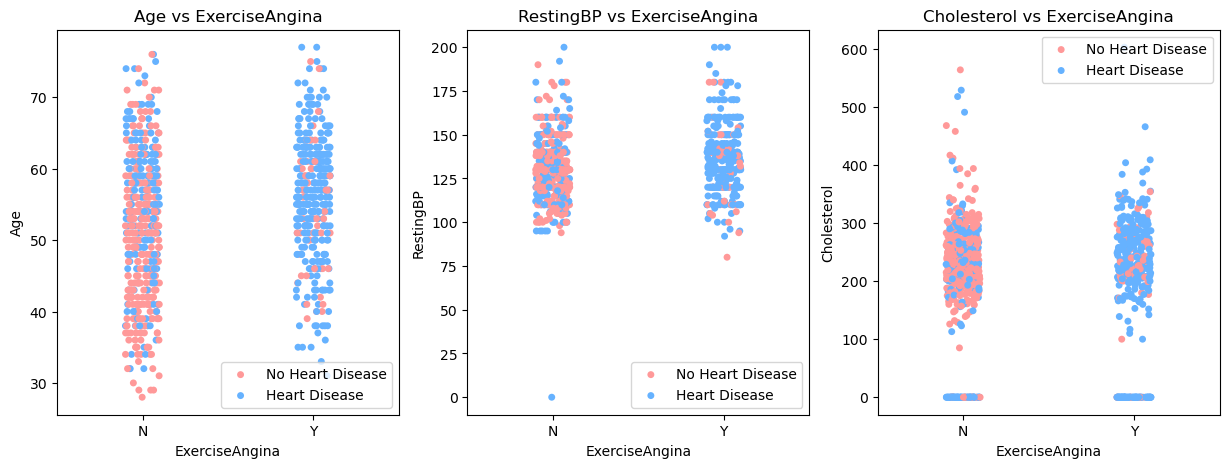

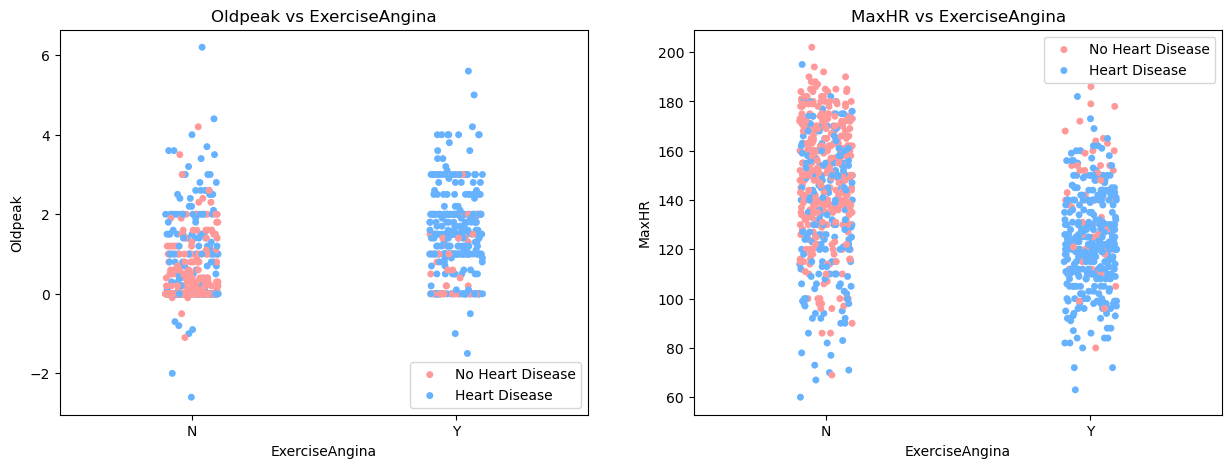

In [25]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

- A crsytal clear observation can be made about the relationship between **heart disease** case and **Exercise induced Angina**. A positive correlation between the 2 features can be concluded throughout all the numerical features. 

#### ST_Slope vs Numerical Features :

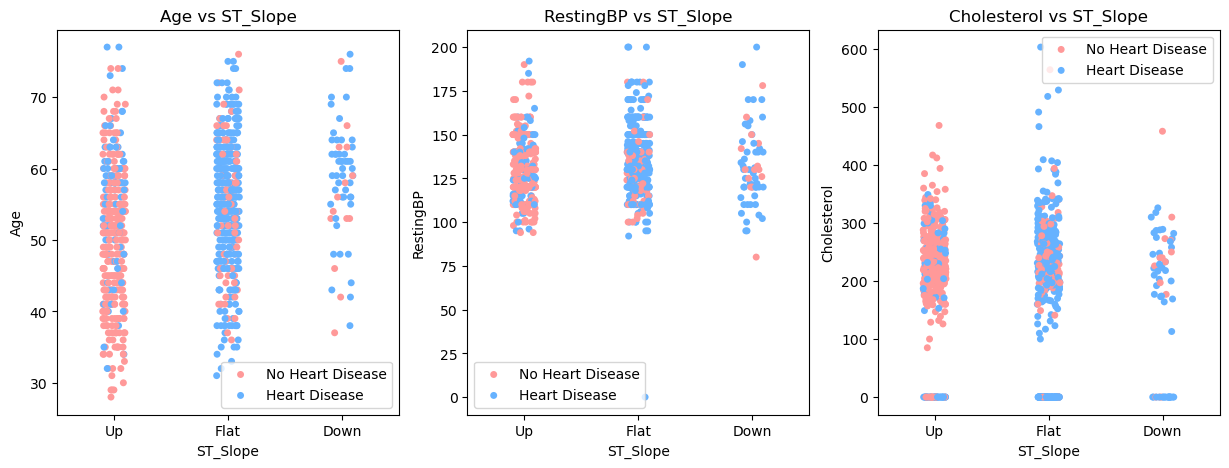

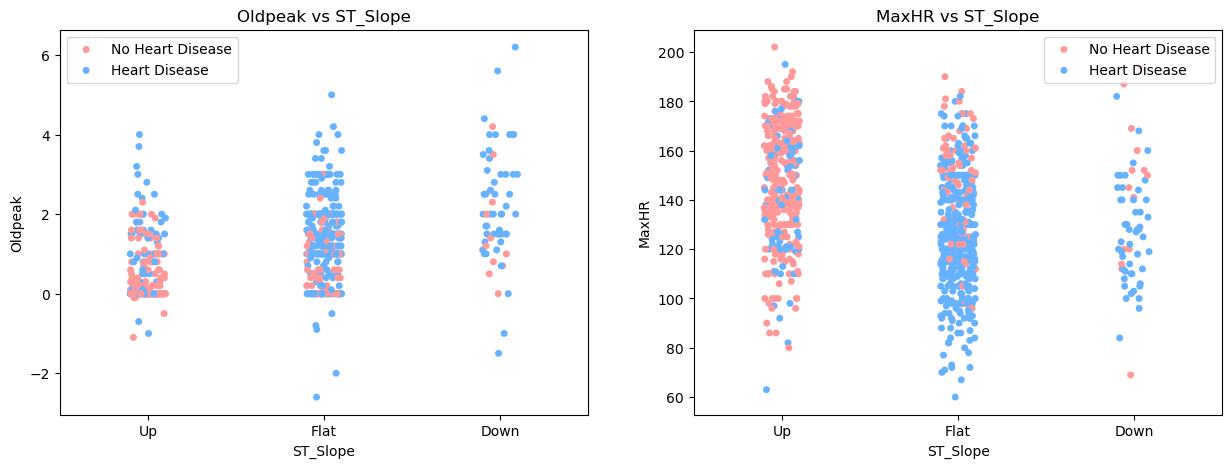

In [26]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

- Another crystal clear positive observation can be made about the positive correlation between **ST_Slope** value and **Heart Disease** cases. 
- **Flat**, **Down** and **Up** in that order display high, middle and low probability of being diagnosed with heart diseases respectively.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

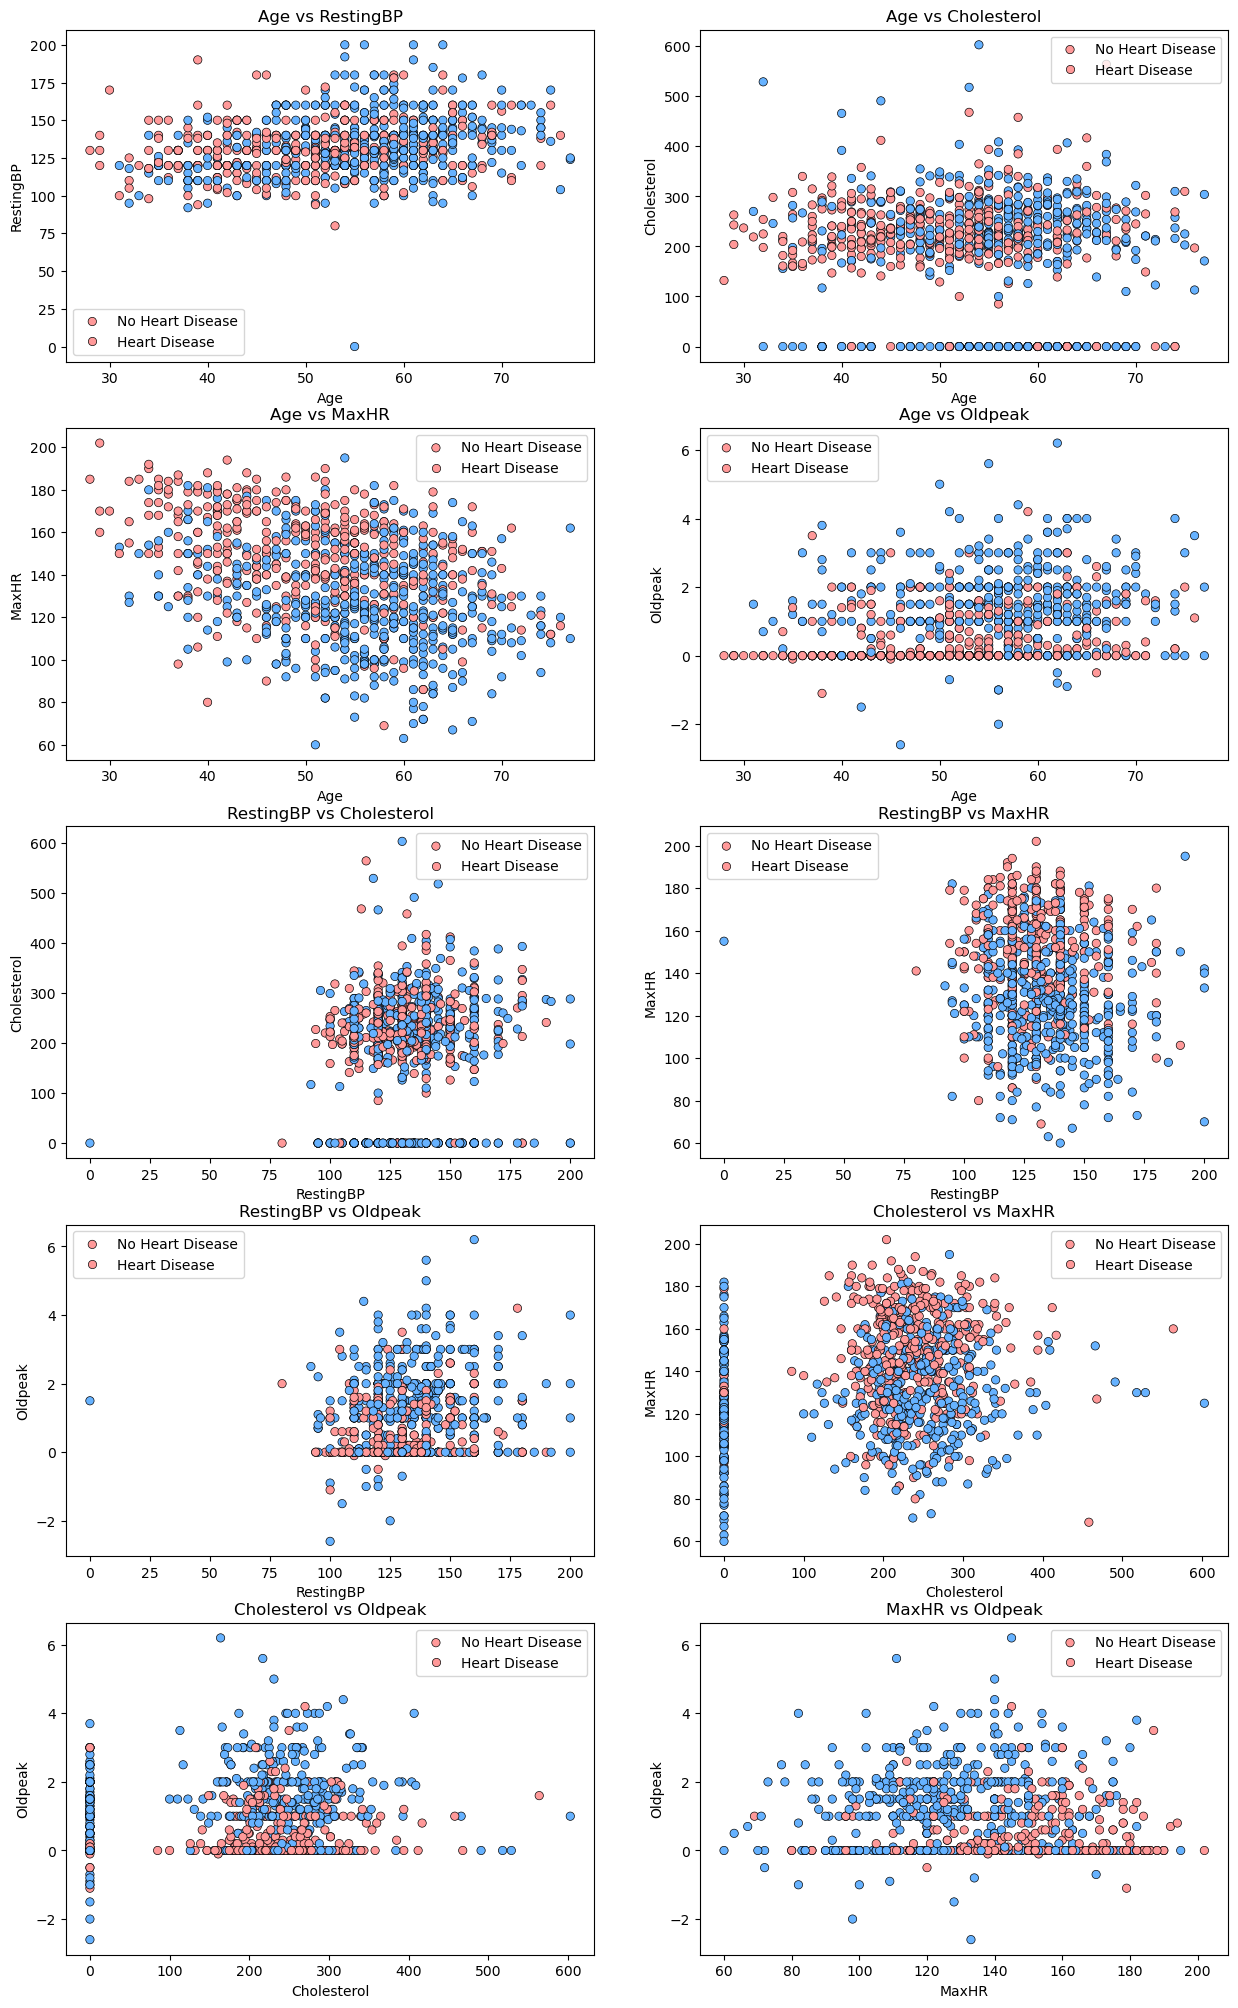

In [27]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For **age** 50+, **RestingBP** between 100 - 175, **Cholesterol** level of 200 - 300,**Max Heart Rate** below 160 and positive **oldpeak** values displays high cases of heart disease.
- For **RestingBP** values 100 - 175, highlights too many heart disease patients for all the features.
- **Cholesterol** values 200 - 300 dominates the heart disease cases.
- Similarly, **Max Heart Rate** values below 140 has high probability of being diagnosed with heart diseases.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for positive cases of heart disease :

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    
**Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!**

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Data Scaling :

In [28]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

### Correlation Matrix :

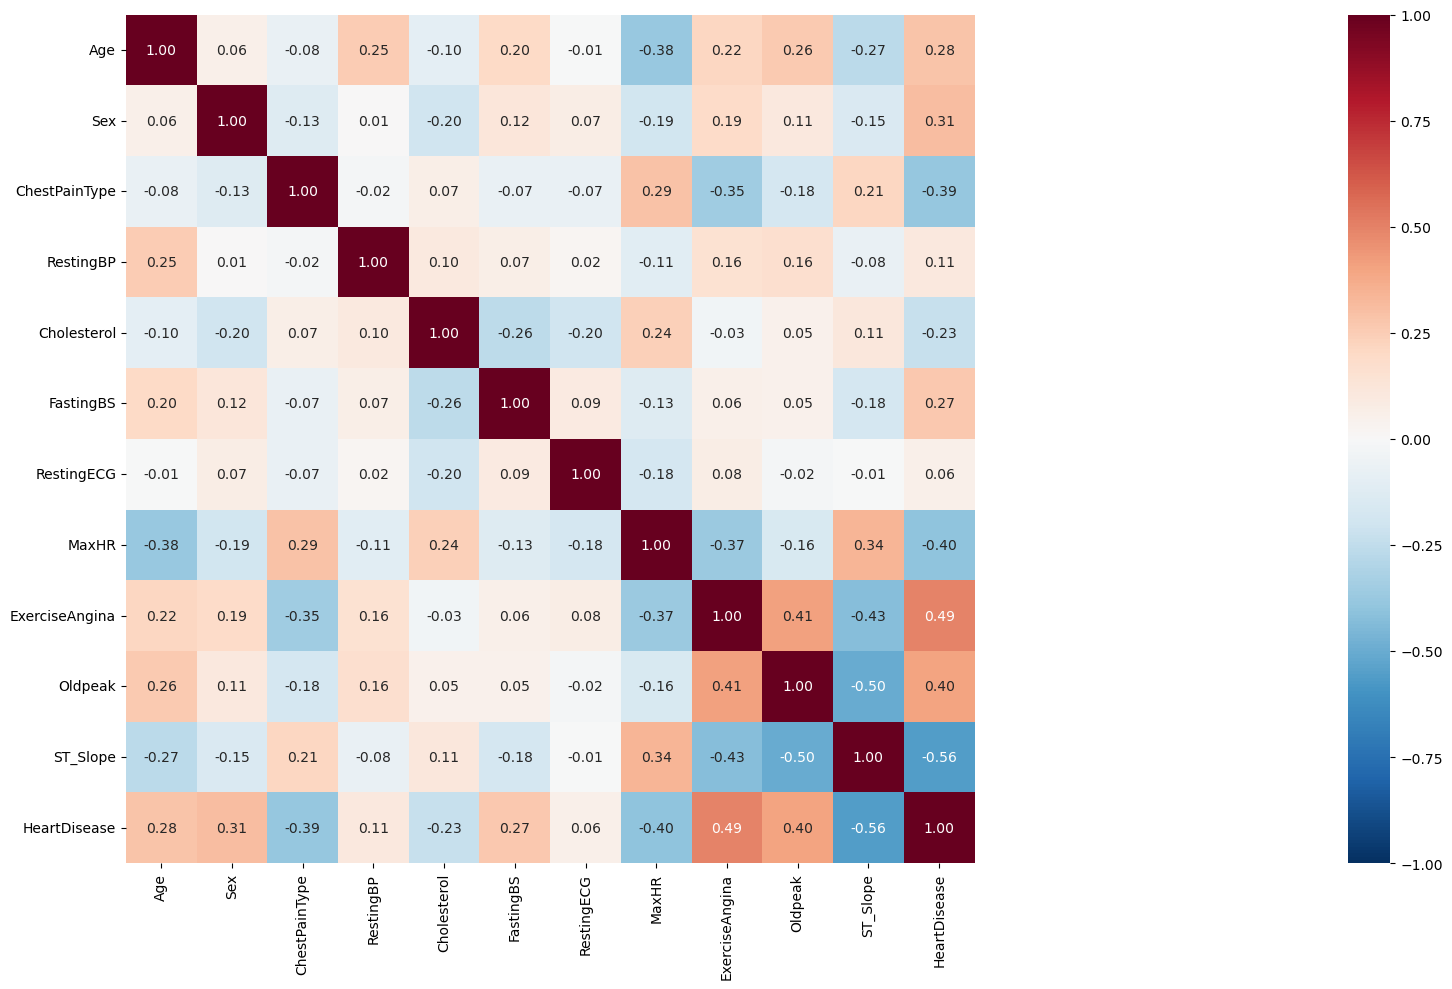

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(75, 10))

# Create heatmap with a proper diverging colormap
# Using 'RdBu_r' which is good for correlation matrices (red for negative, blue for positive)
sns.heatmap(df1.corr(), 
            cmap='RdBu_r',  # Red-Blue diverging colormap
            annot=True,     # Show correlation values
            vmin=-1,        # Set minimum value
            vmax=1,         # Set maximum value
            center=0,       # Center the colormap at 0
            fmt='.2f',      # Format annotations to 2 decimal places
            square=True)    # Make the cells square

# Adjust layout to prevent label cutoff
plt.tight_layout()

- It is a huge matrix with too many features. We will check the correlation only with respect to **HeartDisease**. 

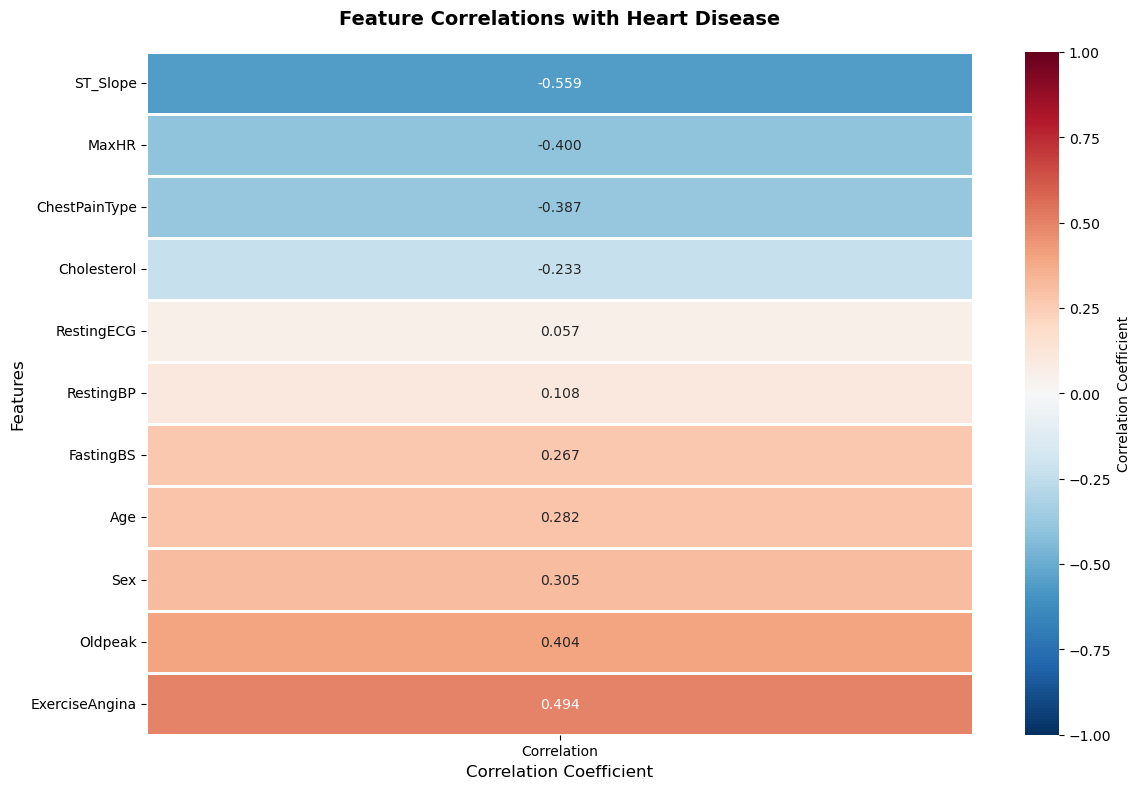

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate correlations with HeartDisease
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=True).to_frame()
corr.columns = ['Correlation']

# Remove HeartDisease's correlation with itself
corr = corr[corr.index != 'HeartDisease']

# Create figure and axis
plt.figure(figsize=(12, 8))

# Create heatmap with enhanced styling
sns.heatmap(corr,
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=1,
            linecolor='white',
            annot_kws={'size': 10})

# Customize the plot
plt.title('Feature Correlations with Heart Disease', pad=20, size=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', size=12)
plt.ylabel('Features', size=12)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features :

#### Chi Squared Test :

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

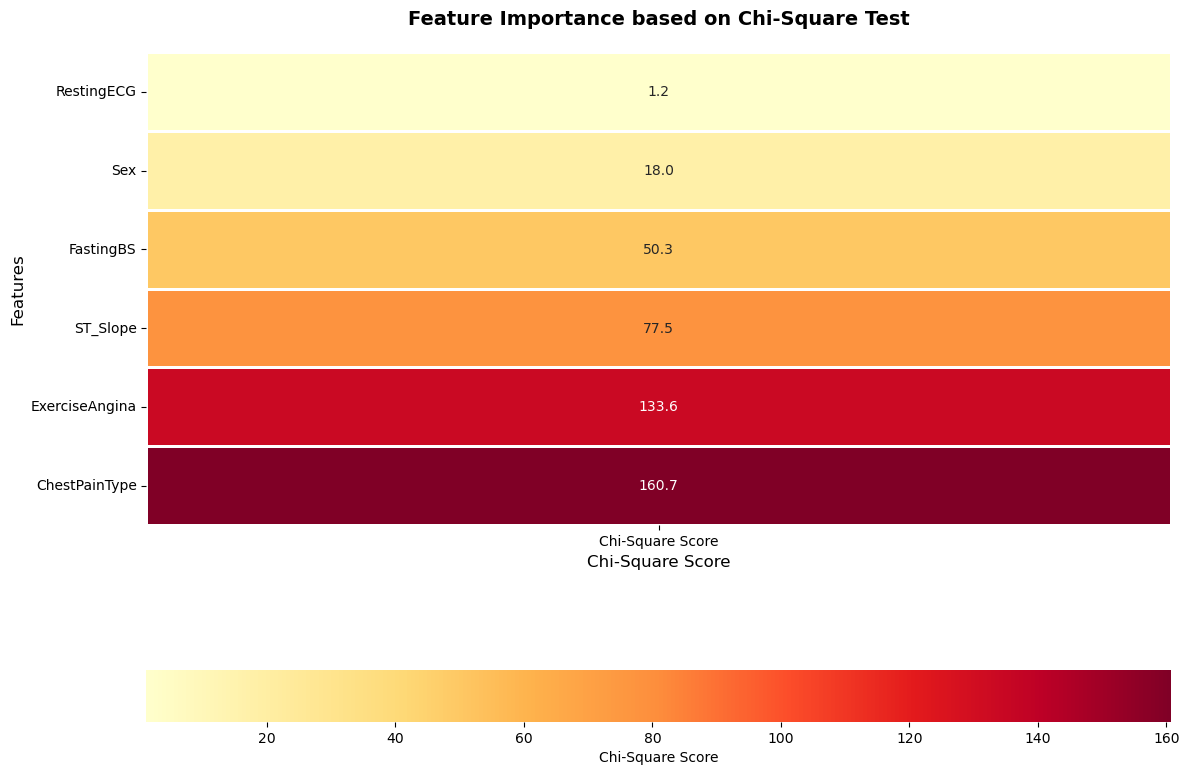

In [32]:
# Calculate Chi-Square scores
features = df1.loc[:, categorical_features[:-1]]
target = df1.loc[:, categorical_features[-1]]
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Create DataFrame with scores and sort
featureScores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['Chi-Square Score']
)
featureScores = featureScores.sort_values(by='Chi-Square Score', ascending=True)

# Create figure
plt.figure(figsize=(12, 8))

# Create heatmap with enhanced styling
sns.heatmap(featureScores,
            annot=True,
            fmt='.1f',  # Round to 1 decimal place
            cmap='YlOrRd',  # Yellow-Orange-Red colormap
            cbar_kws={
                'label': 'Chi-Square Score',
                'orientation': 'horizontal',
                'pad': 0.2
            },
            linewidths=1,
            linecolor='white',
            annot_kws={'size': 10})

# Customize the plot
plt.title('Feature Importance based on Chi-Square Test', 
          pad=20, 
          size=14, 
          fontweight='bold')

# Adjust labels
plt.xlabel('Chi-Square Score', size=12)
plt.ylabel('Features', size=12)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

- Except **RestingECG**, all the remaining categorical features are pretty important for predicting heart diseases.

### Feature Selection for Numerical Features :

#### ANOVA Test :

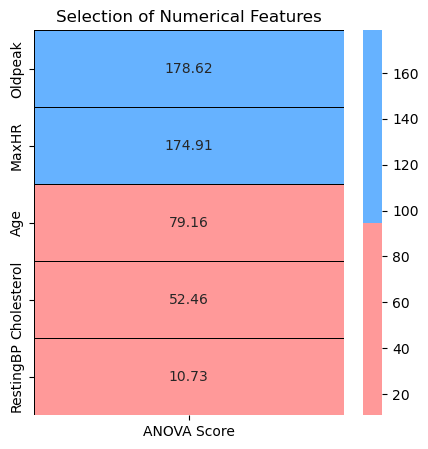

In [33]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- We will leave out **RestingBP** from the modeling part and take the remaining features.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Modeling</div></center>

In [34]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 6.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install sagemaker

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold


In [37]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.40, random_state = 2)

Tuning models...
Tuning XGBoost...
Tuning Random Forest...
Tuning KNN...

Evaluating models on trials...

Plotting results...


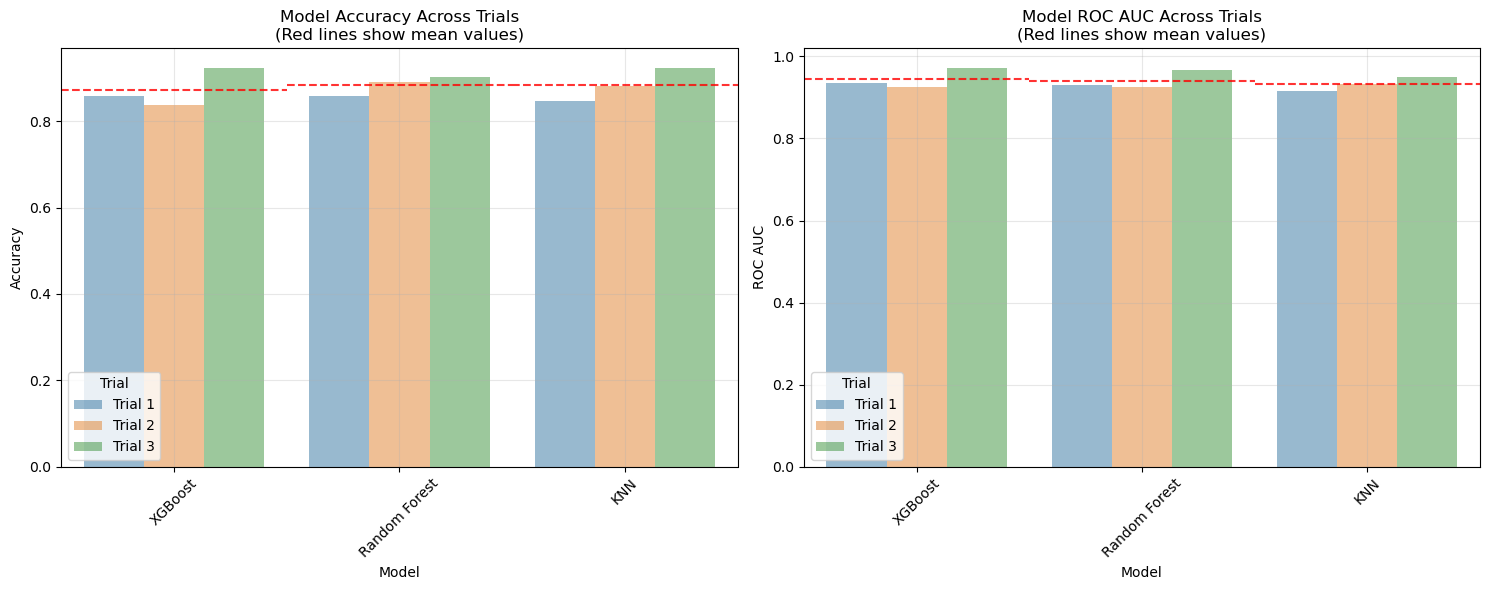

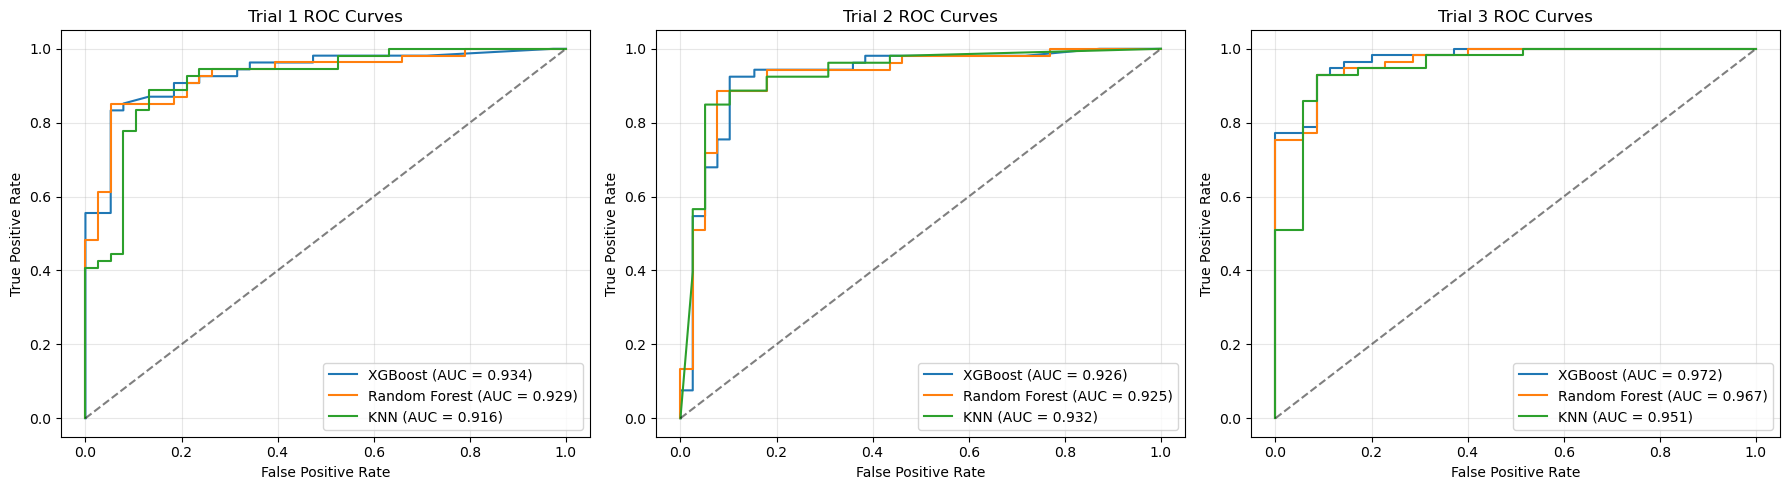

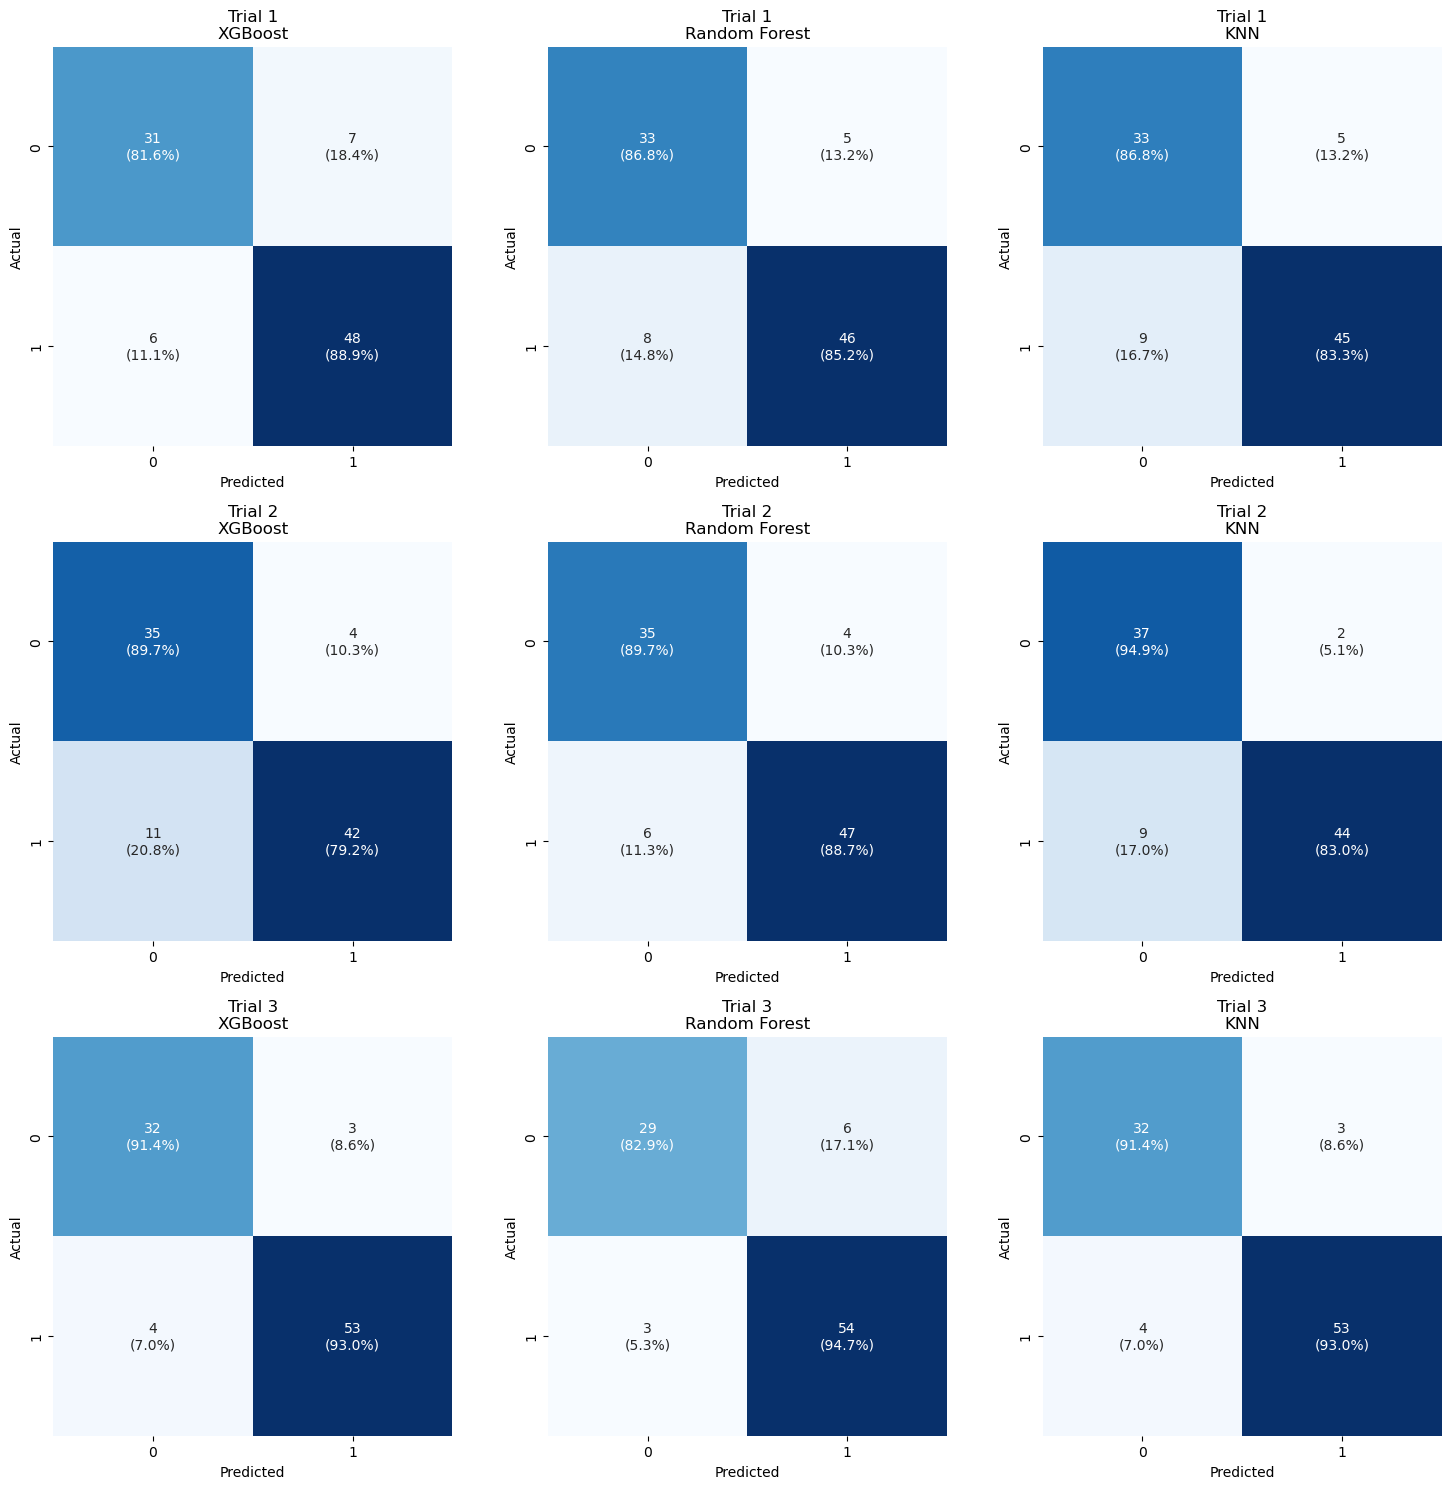

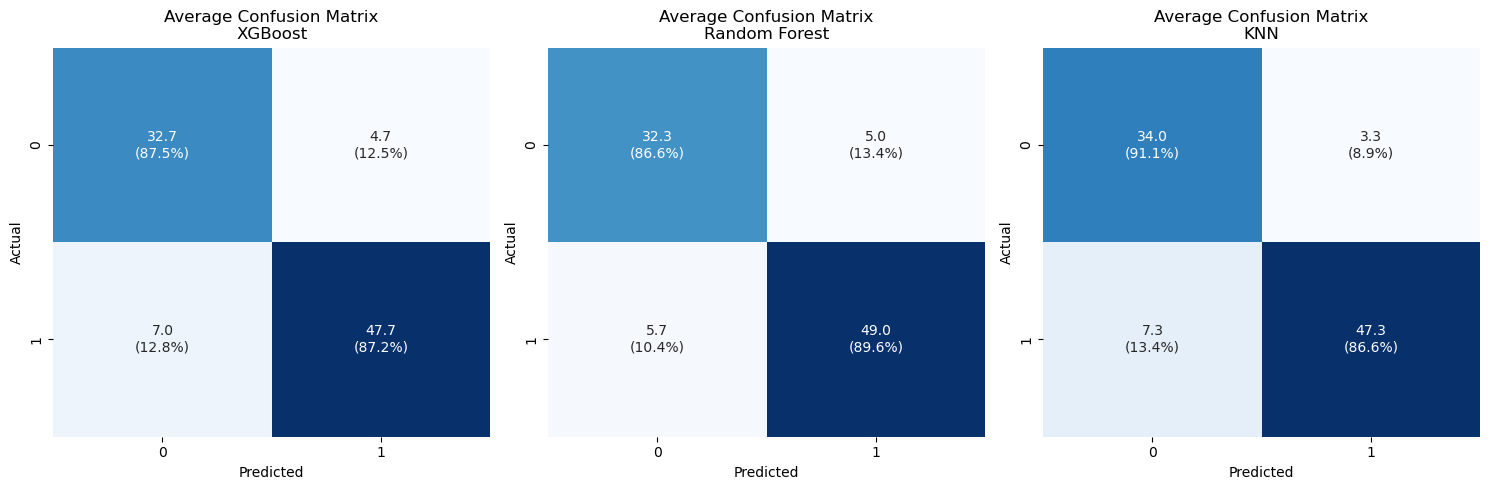


Detailed Summary Statistics:

Trial 1:
--------------------------------------------------------------------------------
        Model Accuracy Precision Recall ROC AUC  TP  FP  TN  FN
      XGBoost   0.8587    0.8727 0.8889  0.9342  48   7  31   6
Random Forest   0.8587    0.9020 0.8519  0.9293  46   5  33   8
          KNN   0.8478    0.9000 0.8333  0.9157  45   5  33   9



Trial 2:
--------------------------------------------------------------------------------
        Model Accuracy Precision Recall ROC AUC  TP  FP  TN  FN
      XGBoost   0.8370    0.9130 0.7925  0.9260  42   4  35  11
Random Forest   0.8913    0.9216 0.8868  0.9250  47   4  35   6
          KNN   0.8804    0.9565 0.8302  0.9318  44   2  37   9



Trial 3:
--------------------------------------------------------------------------------
        Model Accuracy Precision Recall ROC AUC  TP  FP  TN  FN
      XGBoost   0.9239    0.9464 0.9298  0.9724  53   3  32   4
Random Forest   0.9022    0.9000 0.9474  0.9669  54  

In [44]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def tune_and_get_best_models(X_train, y_train, cv=5):
    """Faster version of model tuning with fewer parameter combinations"""
    tuning_results = {}
    
    # XGBoost Tuning - Reduced parameters
    print("Tuning XGBoost...")
    xgb_params = {
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200],
        'min_child_weight': [1, 5]
    }
    xgb_model = xgb.XGBClassifier(
        eval_metric='logloss',
        random_state=42
    )
    xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=cv, scoring='roc_auc', n_jobs=-1)
    xgb_grid.fit(X_train, y_train)
    tuning_results['XGBoost'] = xgb_grid.best_estimator_
    
    # Random Forest Tuning - Reduced parameters
    print("Tuning Random Forest...")
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced']
    }
    rf_model = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1)
    rf_grid.fit(X_train, y_train)
    tuning_results['Random Forest'] = rf_grid.best_estimator_
    
    # KNN Tuning - Reduced parameters
    print("Tuning KNN...")
    knn_params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    knn_model = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn_model, knn_params, cv=cv, scoring='roc_auc', n_jobs=-1)
    knn_grid.fit(X_train, y_train)
    tuning_results['KNN'] = knn_grid.best_estimator_
    
    return tuning_results

def create_test_trials(X_test, y_test, n_trials=3):
    """Split test data into three trials"""
    trials = []
    test_size = len(X_test) // 3
    
    for i in range(n_trials):
        start_idx = i * test_size
        end_idx = (i + 1) * test_size if i < 2 else len(X_test)
        
        trials.append({
            'X_test': X_test[start_idx:end_idx],
            'y_test': y_test[start_idx:end_idx]
        })
    
    return trials

def evaluate_models_on_trials(models, trials):
    """Evaluate each model on each trial"""
    results = {f'Trial {i+1}': {} for i in range(len(trials))}
    
    for trial_num, trial_data in enumerate(trials, 1):
        for model_name, model in models.items():
            # Get predictions
            y_pred = model.predict(trial_data['X_test'])
            y_pred_proba = model.predict_proba(trial_data['X_test'])[:, 1]
            
            # Calculate metrics
            results[f'Trial {trial_num}'][model_name] = {
                'accuracy': accuracy_score(trial_data['y_test'], y_pred),
                'auc': roc_auc_score(trial_data['y_test'], y_pred_proba),
                'confusion_matrix': confusion_matrix(trial_data['y_test'], y_pred),
                'y_test': trial_data['y_test'],
                'y_pred_proba': y_pred_proba
            }
    
    return results

def calculate_aggregate_metrics(results):
    """Calculate mean and standard deviation of metrics across trials"""
    metrics_summary = {}
    
    # Get all model names from the first trial
    model_names = list(results['Trial 1'].keys())
    
    for model_name in model_names:
        metrics_summary[model_name] = {
            'accuracy': {
                'mean': np.mean([results[f'Trial {i+1}'][model_name]['accuracy'] 
                               for i in range(len(results))]),
                'std': np.std([results[f'Trial {i+1}'][model_name]['accuracy'] 
                             for i in range(len(results))])
            },
            'auc': {
                'mean': np.mean([results[f'Trial {i+1}'][model_name]['auc'] 
                               for i in range(len(results))]),
                'std': np.std([results[f'Trial {i+1}'][model_name]['auc'] 
                             for i in range(len(results))])
            },
            'confusion_matrix': np.mean([results[f'Trial {i+1}'][model_name]['confusion_matrix'] 
                                       for i in range(len(results))], axis=0)
        }
    
    return metrics_summary


def plot_trial_results(results, aggregate_metrics):
    """Create enhanced visualizations for trial results"""
    # Create DataFrame for plotting
    metrics_data = []
    for trial_name, trial_results in results.items():
        for model_name, model_results in trial_results.items():
            metrics_data.append({
                'Trial': trial_name,
                'Model': model_name,
                'Accuracy': model_results['accuracy'],
                'ROC AUC': model_results['auc']
            })
    
    metrics_df = pd.DataFrame(metrics_data)
    
    # Plot individual trials and mean performance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot Accuracy with mean values
    sns.barplot(data=metrics_df, x='Model', y='Accuracy', hue='Trial', alpha=0.5, ax=ax1)
    for model_name, metrics in aggregate_metrics.items():
        ax1.axhline(y=metrics['accuracy']['mean'], 
                   xmin=list(aggregate_metrics.keys()).index(model_name)/len(aggregate_metrics),
                   xmax=list(aggregate_metrics.keys()).index(model_name)/len(aggregate_metrics) + 1/len(aggregate_metrics),
                   color='red', linestyle='--', alpha=0.8)
    ax1.set_title('Model Accuracy Across Trials\n(Red lines show mean values)')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Plot ROC AUC with mean values
    sns.barplot(data=metrics_df, x='Model', y='ROC AUC', hue='Trial', alpha=0.5, ax=ax2)
    for model_name, metrics in aggregate_metrics.items():
        ax2.axhline(y=metrics['auc']['mean'], 
                   xmin=list(aggregate_metrics.keys()).index(model_name)/len(aggregate_metrics),
                   xmax=list(aggregate_metrics.keys()).index(model_name)/len(aggregate_metrics) + 1/len(aggregate_metrics),
                   color='red', linestyle='--', alpha=0.8)
    ax2.set_title('Model ROC AUC Across Trials\n(Red lines show mean values)')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    # ROC Curves
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for trial_num, (trial_name, trial_results) in enumerate(results.items()):
        ax = axes[trial_num]
        
        for model_name, model_results in trial_results.items():
            fpr, tpr, _ = roc_curve(model_results['y_test'], model_results['y_pred_proba'])
            ax.plot(fpr, tpr, label=f'{model_name} (AUC = {model_results["auc"]:.3f})')
        
        ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        ax.set_title(f'{trial_name} ROC Curves')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

    # Individual Trial Confusion Matrices
    n_trials = len(results)
    n_models = len(results['Trial 1'])
    
    # Create a figure with subplots for each trial and model
    fig, axes = plt.subplots(n_trials, n_models, 
                            figsize=(5*n_models, 5*n_trials))
    
    # If there's only one trial, wrap axes in a list to handle indexing consistently
    if n_trials == 1:
        axes = [axes]
    
    # Plot confusion matrix for each trial and model
    for trial_idx, (trial_name, trial_results) in enumerate(results.items()):
        for model_idx, (model_name, model_results) in enumerate(trial_results.items()):
            ax = axes[trial_idx][model_idx]
            cm = model_results['confusion_matrix']
            
            # Calculate percentages
            cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
            
            # Create annotation text with both count and percentage
            annotations = np.asarray([
                [f'{count:0.0f}\n({percent:.1f}%)' 
                 for count, percent in zip(row_counts, row_percents)]
                for row_counts, row_percents in zip(cm, cm_percent)
            ])
            
            # Plot heatmap
            sns.heatmap(
                cm,
                annot=annotations,
                fmt='',
                cmap='Blues',
                ax=ax,
                cbar=False,
                square=True
            )
            
            # Set titles and labels
            ax.set_title(f'{trial_name}\n{model_name}')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

    # Average Confusion Matrices
    fig, axes = plt.subplots(1, len(aggregate_metrics), figsize=(15, 5))
    
    for idx, (model_name, metrics) in enumerate(aggregate_metrics.items()):
        ax = axes[idx]
        cm = metrics['confusion_matrix']
        
        # Calculate percentages
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        sns.heatmap(
            cm,
            annot=np.asarray([
                [f'{count:.1f}\n({percent:.1f}%)' for count, percent in zip(row_counts, row_percents)]
                for row_counts, row_percents in zip(cm, cm_percent)
            ]),
            fmt='',
            cmap='Blues',
            ax=ax,
            cbar=False
        )
        
        ax.set_title(f'Average Confusion Matrix\n{model_name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

def evaluate_models_on_trials(models, trials):
    """Evaluate each model on each trial with comprehensive metrics"""
    results = {f'Trial {i+1}': {} for i in range(len(trials))}
    
    for trial_num, trial_data in enumerate(trials, 1):
        for model_name, model in models.items():
            # Get predictions
            y_pred = model.predict(trial_data['X_test'])
            y_pred_proba = model.predict_proba(trial_data['X_test'])[:, 1]
            
            # Calculate all metrics
            cm = confusion_matrix(trial_data['y_test'], y_pred)
            tn, fp, fn, tp = cm.ravel()
            
            # Calculate metrics
            results[f'Trial {trial_num}'][model_name] = {
                'accuracy': accuracy_score(trial_data['y_test'], y_pred),
                'precision': precision_score(trial_data['y_test'], y_pred),
                'recall': recall_score(trial_data['y_test'], y_pred),
                'auc': roc_auc_score(trial_data['y_test'], y_pred_proba),
                'confusion_matrix': cm,
                'y_test': trial_data['y_test'],
                'y_pred_proba': y_pred_proba,
                # Additional detailed metrics
                'true_positives': tp,
                'false_positives': fp,
                'true_negatives': tn,
                'false_negatives': fn
            }
    
    return results

def calculate_aggregate_metrics(results):
    """Calculate mean and standard deviation of all metrics across trials"""
    metrics_summary = {}
    
    # Get all model names from the first trial
    model_names = list(results['Trial 1'].keys())
    
    for model_name in model_names:
        metrics_summary[model_name] = {
            'accuracy': {
                'mean': np.mean([results[f'Trial {i+1}'][model_name]['accuracy'] 
                               for i in range(len(results))]),
                'std': np.std([results[f'Trial {i+1}'][model_name]['accuracy'] 
                             for i in range(len(results))])
            },
            'precision': {
                'mean': np.mean([results[f'Trial {i+1}'][model_name]['precision'] 
                               for i in range(len(results))]),
                'std': np.std([results[f'Trial {i+1}'][model_name]['precision'] 
                             for i in range(len(results))])
            },
            'recall': {
                'mean': np.mean([results[f'Trial {i+1}'][model_name]['recall'] 
                               for i in range(len(results))]),
                'std': np.std([results[f'Trial {i+1}'][model_name]['recall'] 
                             for i in range(len(results))])
            },
            'auc': {
                'mean': np.mean([results[f'Trial {i+1}'][model_name]['auc'] 
                               for i in range(len(results))]),
                'std': np.std([results[f'Trial {i+1}'][model_name]['auc'] 
                             for i in range(len(results))])
            },
            'confusion_matrix': np.mean([results[f'Trial {i+1}'][model_name]['confusion_matrix'] 
                                       for i in range(len(results))], axis=0)
        }
    
    return metrics_summary

def run_complete_analysis(features, target):
    """Run complete analysis pipeline with comprehensive metrics"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    # Tune and get best models
    print("Tuning models...")
    best_models = tune_and_get_best_models(X_train, y_train)
    
    # Create test trials
    trials = create_test_trials(X_test, y_test)
    
    # Evaluate models on trials
    print("\nEvaluating models on trials...")
    results = evaluate_models_on_trials(best_models, trials)
    
    # Calculate aggregate metrics
    aggregate_metrics = calculate_aggregate_metrics(results)
    
    # Plot results
    print("\nPlotting results...")
    plot_trial_results(results, aggregate_metrics)
    
    # Print detailed summary statistics
    print("\nDetailed Summary Statistics:")
    print("=" * 80)
    
    # Print individual trial results with all metrics
    for trial_name, trial_results in results.items():
        print(f"\n{trial_name}:")
        print("-" * 80)
        
        # Create a DataFrame for prettier printing
        trial_data = []
        for model_name, metrics in trial_results.items():
            trial_data.append({
                'Model': model_name,
                'Accuracy': f"{metrics['accuracy']:.4f}",
                'Precision': f"{metrics['precision']:.4f}",
                'Recall': f"{metrics['recall']:.4f}",
                'ROC AUC': f"{metrics['auc']:.4f}",
                'TP': metrics['true_positives'],
                'FP': metrics['false_positives'],
                'TN': metrics['true_negatives'],
                'FN': metrics['false_negatives']
            })
        
        # Convert to DataFrame and print
        df = pd.DataFrame(trial_data)
        print(df.to_string(index=False))
        print("\n")
    
    # Print aggregate results
    print("\nAggregate Results (across all trials):")
    print("=" * 80)
    
    # Create a DataFrame for aggregate results
    agg_data = []
    for model_name, metrics in aggregate_metrics.items():
        agg_data.append({
            'Model': model_name,
            'Accuracy': f"{metrics['accuracy']['mean']:.4f} (±{metrics['accuracy']['std']:.4f})",
            'Precision': f"{metrics['precision']['mean']:.4f} (±{metrics['precision']['std']:.4f})",
            'Recall': f"{metrics['recall']['mean']:.4f} (±{metrics['recall']['std']:.4f})",
            'ROC AUC': f"{metrics['auc']['mean']:.4f} (±{metrics['auc']['std']:.4f})"
        })
    
    # Convert to DataFrame and print
    agg_df = pd.DataFrame(agg_data)
    print(agg_df.to_string(index=False))
    print("\n")
    
    return best_models, results, aggregate_metrics

# Run the analysis
best_models, trial_results, aggregate_metrics = run_complete_analysis(features, target)

Tuning models...


NameError: name 'tune_and_get_best_models' is not defined